
## Classification comparison of Random forest and support vecotr machine 

#### Qianjun Liu
#### Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary
Random forest and support vecotr machine are two method for classification. Take a high dimentional classification project as example, the modeling with random forest and support vecotor manchine are compared. The senstivity of hyperparameters, as well as the sample size of model accuaracy were invesitgated. Compared with RF, SVM has higher flexibiity with hyperparameter tunning, while RF has higher accuracy. 

### Import Packages

In [392]:
#import machine learning library sklearn, data processing library numpy, pandas, drawing library matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import pandas.plotting as pd_plot
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

### Functions
The following functions will be used in the workflow.

In [393]:
def plot_corr(dataframe,size=20):                         # plots a correlation matrix as a heat map 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

### Load Data

The following workflow applies the .csv file 'feature_all_miss_m.csv', 'feature_all_miss_2.csv', 'label_3_miss.csv','label_2_miss.csv', 'resultfinal.csv'. Comprehensive logging data are derived from geochemical logging, nuclear magnetic resonance logging, gas logging and light hydrocarbon logging data.

We will work with the following features:
* **S0-Gaseous hydrocarbon content** -Gaseous hydrocarbon content per unit mass of rock at 90°C; mg/g
* **S1-Liquid hydrocarbon content** - Liquid hydrocarbon content per unit mass of rock at 300°C; mg/g
* **S2-Cracking hydrocarbon content** - Cracked hydrocarbon content per unit mass of rock at 300°C to 600°C; mg/g
* **porosity** - fraction of rock void in units of percentage
* **Tmax-peak temperature** - The temperature corresponding to the highest point of peak S2; °C
* **Permeability** - ability of a fluid to flow through the rock in mil;iDarcy
* **Movable fluid** - The proportion of movable fluid to total fluid; %
* **Oil saturation** - the fraction of the porosity of a zone occupied by oil; %
* **Total hydrocarbon** - any mixture of hydrocarbons that are found in crude oil; %
* **C1** - the content of methane; %
* **C2** - the content of ethane; %
* **aC3** -the content of propane; %
* **iC4** - the content of isobutane; %
* **anC4** -the content of n-butane; %
* **Number of peaks** - The content of each component is described by the peak area; mv.s 
* **Benzene** -Benzene content; %
* **Toluene** - Content of toluene; % 
* **22DMC4** - Content of 22DMC4; % 
* **22DMC5** - Content of 22DMC5; % 
* **22DMC6** - Content of 22DMC6; % 
* **33DMC5** - Content of 33DMC5; % 
* **Methylcyclothane index** - defined by (2MC6+23DMC5+3MC6)/(c13DMCYC5+t13DMCYC5+t12DMCYC5); --
* **BZ/CYC6** -Content of BZ/CYC6; % 
* **TOL/MCYC6 C1-C5** -Content of  TOL/MCYC6 total hydrocarbon composed of C1-C5; % 
* **C1-C5/ total hydrocarbon** -Content of  C1-C5/ total hydrocarbon; % 
* **total hydrocarbon C1/** -Content of  total hydrocarbon composed of C1; % 

### Read the data table

In [394]:
#Load the sample data set
features = pd.read_csv("https://raw.githubusercontent.com/QianjunjunLiu/MLProject_DATA/main/feature_all_miss_m.csv")
X1 = features.values

### Basic Data Checking and Visualization

In [428]:
#This code is referenced from Dr. Michael pyrcz
pd.set_option('display.max_rows', None)
features.head(n=10) 

S0      S1      S2   Tmax  Porosity  Permeability  Fluid saturation  \
0  0.0059  0.0148  0.0906  445.0      9.50      5.448882             62.34   
1  0.0023  2.6840  0.4237  313.0     19.32      9.148258             34.15   
2  0.0031  0.0126  0.1426  434.0      7.58      0.015445             12.16   
3  0.0006  1.0932  0.1459  314.0     12.09      1.760917             36.75   
4  0.0012  2.5532  0.7561  330.0     17.06     21.731929             50.62   
5  0.0014  0.0884  0.0452  327.0      9.32      0.011222              7.24   
6  0.0131  1.9373  1.0520  430.0     17.64     10.272334             39.73   
7  0.0110  0.0490  0.1058  511.0      8.72      0.240805             29.23   
8  0.0106  0.0862  0.1063  441.0      4.82      0.041730             36.01   
9  0.0134  0.7593  0.2682  328.0     10.89      0.303597             22.92   

   Oil saturation  Total hydrocarbon (gas measurement)        C1  ...  \
0           37.24                             3.791000  2.510000  ...   
1           38.89                            10.168500  4.056500  ...   
2            3.81                             1.339000  0.812000  ...   
3           27.01                             0.948000  0.395000  ...   
4           29.04                             0.890000  0.392000  ...   
5           10.26                             0.527000  0.267000  ...   
6           33.60                             3.043200  2.151400  ...   
7            5.66                             4.275199  2.381599  ...   
8            9.13                             1.530000  0.845000  ...   
9           26.65                             3.016600  1.937800  ...   

   toluene    22DMC4  22DMC5  22DMC6   33DMC5  Methyl cyclothane index  \
0   27.596   78.4670  49.144  52.138  23.5870                 4.165789   
1   10.672   45.3670  25.852  36.733  13.2930                 4.249777   
2   15.280   53.6832  31.626  37.534  14.9686                 4.602025   
3   52.664  126.5160  69.710  83.338  40.7470                 3.473272   
4   52.664  126.5160  69.710  83.338  40.7470                 3.473272   
5    9.335   29.0270  15.586  25.902   6.0910                 3.958805   
6    6.897   59.7260  12.588   0.000   0.0000                 2.290000   
7   55.189   60.2250  46.513  72.021  24.9960                 3.747151   
8   13.211   45.5730  25.572  21.088  10.4730                 3.723101   
9   31.437   82.6070  49.423  48.074  24.4980                 4.099665   

    BZ/CYC6  TOL/MCYC6  C1-C5/ total hydrocarbon  C1/ total hydrocarbon  
0  0.395481   0.022767                  0.575355               0.363395  
1  0.134188   0.016364                  0.695476               0.424466  
2  0.397131   0.015246                  0.616064               0.382227  
3  0.313144   0.033805                  0.734547               0.459798  
4  0.313144   0.033805                  0.734547               0.459798  
5  0.312840   0.021123                  0.650526               0.406501  
6  0.404657   0.005908                  0.649819               0.452462  
7  0.420038   0.045864                  0.591130               0.354305  
8  0.410394   0.019214                  0.676918               0.459339  
9  0.462913   0.026327                  0.634983               0.364669  

[10 rows x 27 columns]

### Missing data visualization

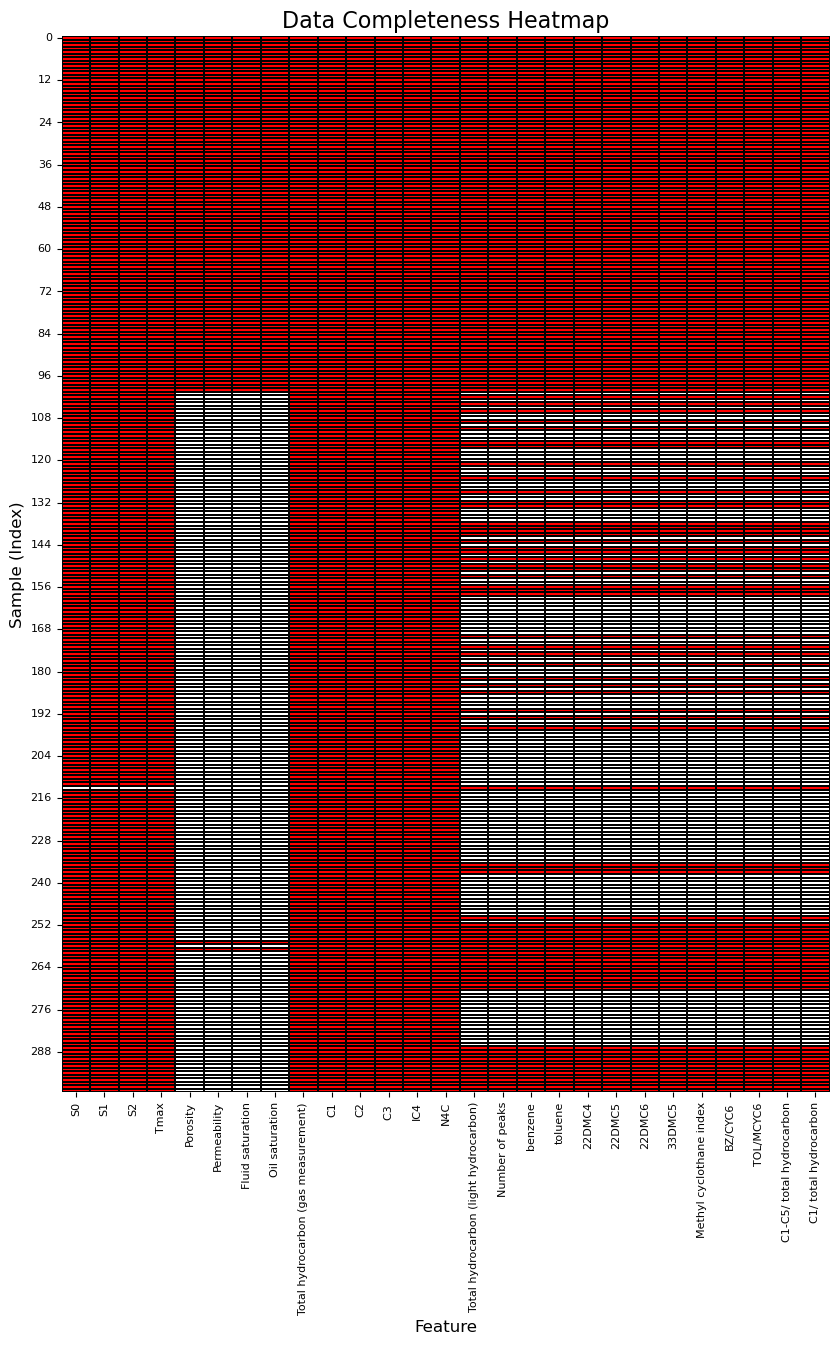

In [396]:
##This code is referenced from Dr. Michael pyrcz

df_temp = features.copy(deep=True)                            # make a deep copy of the DataFrame
df_bool = df_temp.isnull()                              # true is value, false if NaN
#df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.1) # make the binary heat map, no bins
heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)

heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()

### Missing data processing
In this study, the average method will be used to fill in the missing data

In [397]:
#citation
imp = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)#对缺失值用中位数处理
imp.fit(X1)
X1 = imp.transform(X1)
df_mean = features.copy(deep=True)                         # make a deep copy of the DataFrame
mean_imputer = SimpleImputer(strategy='mean')
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)
features = df_mean
features.describe().transpose() 

count          mean           std  \
S0                                     300.0      0.022302      0.050850   
S1                                     300.0      0.864202      1.905439   
S2                                     300.0      1.145195      2.186228   
Tmax                                   300.0    432.064660     29.831403   
Porosity                               300.0     11.747476      2.936055   
Permeability                           300.0     15.104288     19.784016   
Fluid saturation                       300.0     32.789709     10.823667   
Oil saturation                         300.0     14.509223      6.233038   
Total hydrocarbon (gas measurement)    300.0      3.321418      5.451210   
C1                                     300.0      1.760460      2.646613   
C2                                     300.0      0.204300      0.404809   
C3                                     300.0      0.100334      0.232122   
IC4                                    300.0      0.019761      0.062410   
N4C                                    300.0      0.034321      0.089345   
Total hydrocarbon (light hydrocarbon)  300.0  19483.099175  23963.440407   
Number of peaks                        300.0     38.693151     13.193894   
benzene                                300.0     47.153817     53.909080   
toluene                                300.0     57.585884     84.368849   
22DMC4                                 300.0     21.905478     31.843698   
22DMC5                                 300.0     12.464129     30.690917   
22DMC6                                 300.0     29.374295     42.903943   
33DMC5                                 300.0      4.031762      7.266189   
Methyl cyclothane index                300.0      1.500825      1.171016   
BZ/CYC6                                300.0      0.143449      0.150739   
TOL/MCYC6                              300.0      0.102133      0.088285   
C1-C5/ total hydrocarbon               300.0      0.776774      0.125073   
C1/ total hydrocarbon                  300.0      0.496576      0.258228   

                                              min          25%           50%  \
S0                                       0.000000     0.006000      0.011400   
S1                                       0.006000     0.040075      0.098500   
S2                                       0.019100     0.152750      0.410900   
Tmax                                   301.000000   429.000000    437.000000   
Porosity                                 1.450000    11.747476     11.747476   
Permeability                             0.000015     6.778834     15.104288   
Fluid saturation                         2.170000    32.789709     32.789709   
Oil saturation                           3.100000    14.509223     14.509223   
Total hydrocarbon (gas measurement)      0.054000     0.651000      1.464000   
C1                                       0.011000     0.349500      0.777500   
C2                                       0.001000     0.022750      0.069000   
C3                                       0.000000     0.013000      0.037000   
IC4                                      0.000000     0.002000      0.006000   
N4C                                      0.000000     0.004000      0.012000   
Total hydrocarbon (light hydrocarbon)   18.554000  7848.016000  19483.099175   
Number of peaks                          2.000000    38.693151     38.693151   
benzene                                  0.000000    10.715750     47.153817   
toluene                                  0.000000    13.258000     57.585884   
22DMC4                                   0.000000     0.000000     21.905478   
22DMC5                                   0.000000     0.000000     12.464129   
22DMC6                                   0.000000     5.274750     29.374295   
33DMC5                                   0.000000     0.000000      4.031762   
Methyl cyclothane index                  0.000000     0.690763      1.

In [398]:
corr_matrix = np.corrcoef(features, rowvar = False)
#print(np.around(corr_matrix,2))   

In [399]:
label = pd.read_csv("https://raw.githubusercontent.com/QianjunjunLiu/MLProject_DATA/main/label_3_miss.csv")
y = np.ravel(label.values)

### 1. Support vector machine 
In this study, Python open source machine learning library scikit-learn was adopted to solve the model. When the model is established, 80% of the sample data is taken as the training data, and the remaining 20% is taken as the prediction data, so as to verify the accuracy of the model. Accuracy is the proportion of the prediction data accurately classified by the trained model.

The sample data is used to build the support vector machine model, and the parameters that affect the accuracy of the model are analyzed.

### 1.1 Influence of model parameters on prediction results
Radial basis kernel function (RBF) is used for oil classification. Because RBF is appropriate for nonlinear with few parameters, which can quickly find the appropriate parameters. In the scikit-learn of support vector classification machine model, the parameters for RBF are mainly C and gamma.

In order to determine C and gamma, the Gridsearch method in scikit-learn is applied, each parameter is given a set of possible values, and each parameter is combined, and the optimal result is selected from each combination.

In [400]:
max_list=[]
sum_score = 0
#for i in range(10):
    #split data
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=81)

    #train
param_grid = {'C':[1,    10,   100,   200,  300,  1e3 ,1e4, 1e5],
              'gamma': [0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1,   1] }
clf = GridSearchCV(SVC(kernel='rbf'), param_grid,cv=5)
clf = clf.fit(X2, y)
    ##print("Best estimator found by grid search:")
print("The best parameters are %s with a score of %0.2f"
         % (clf.best_params_, clf.best_score_))
    #predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
score = clf.score(X_test, y_test)
max_list.append(score)

The best parameters are {'C': 10, 'gamma': 1} with a score of 0.73
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.80      0.80      0.80         5
           3       0.96      1.00      0.98        45

    accuracy                           0.95        60
   macro avg       0.92      0.87      0.89        60
weighted avg       0.95      0.95      0.95        60



### 1.2 Gamma and C’s influence on accuracy
With given Gamma, as C increases, the accuracy first increases and then decreases. The same is true for gamma when C is given.
In order to show the influence of C and gamma on the Accuracy of the model, Gridsearch method is not used. Instead, C and gamma are fixed respectively to study the influence of another parameter on the results.

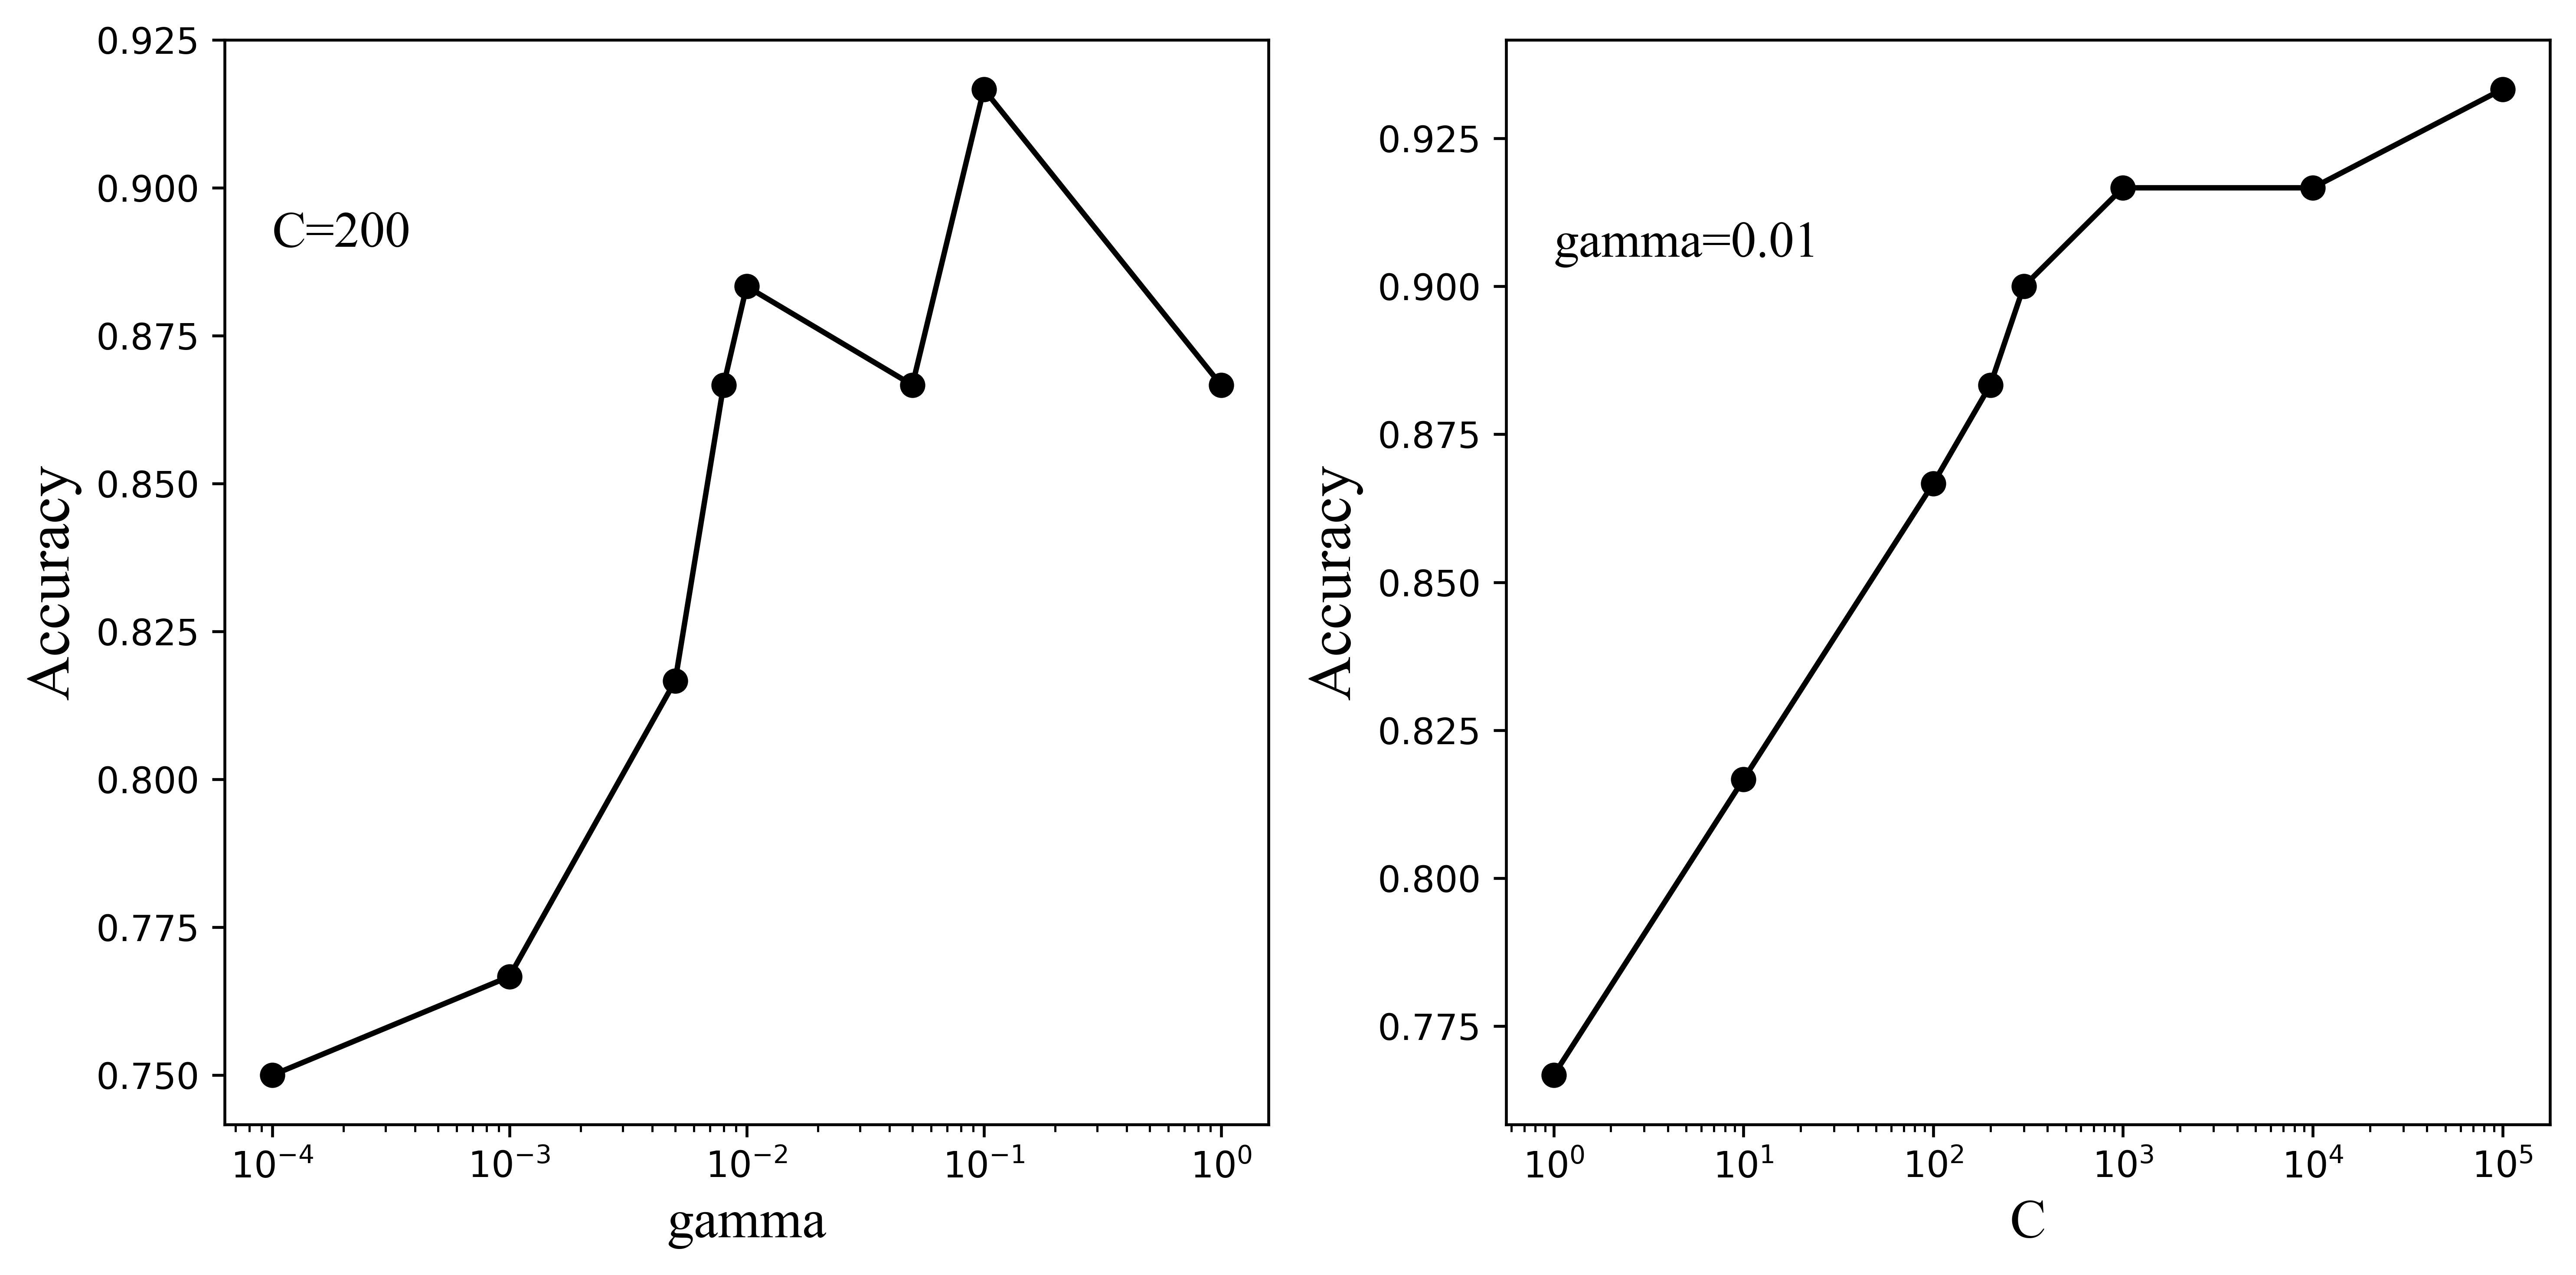

In [401]:
score1=[]#with fixed C, the accuracy corresponding to different gamma was stored
score2=[]#with fixed gamma, the accuracy corresponding to different C was stored

##The sample data was divided into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
X2, y, test_size=0.2, random_state= 81)


Gamma=[0.0001, 0.001, 0.005, 0.008, 0.01, 0.05, 0.1,   1]
C =   [     1,    10,   100,   200,  300,  1e3 ,1e4, 1e5]

# Given C, study the effect of gamma on accuracy
for g in Gamma:
    #train
    clf = SVC(kernel='rbf',C=100,gamma=g)
    clf = clf.fit(X_train, y_train)


    #predict
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred,zero_division=0))
    #print(clf.score(X_test, y_test))
    #print('.........................................')
    score1.append(clf.score(X_test, y_test))
#print('--------------------------------------------------------------')

# Given gamma, study the effect of C on accuracy
for c in C:
    clf2 = SVC(kernel='rbf',C=c,gamma=0.05)
    clf2 = clf2.fit(X_train, y_train)
    

    #predict
    y_pred = clf2.predict(X_test)
    #print(classification_report(y_test, y_pred,zero_division=0))
    #print(clf2.score(X_test, y_test))
    #print('.........................................')
    score2.append(clf2.score(X_test, y_test))
#print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')   
#print("score1: " + str(score1))
#print("max score1 is: "+ str(max(score1)))
#print('==========================')
#print("score2: " + str(score2))
#print("max score2 is: "+ str(max(score2)))

fig, axes = plt.subplots(1,2,figsize=(10,5),dpi=600)

axes[0].semilogx(Gamma,score1,marker='o',markerfacecolor='black',color='black')
axes[0].set_xlabel('gamma',fontsize=15,fontname='Times New Roman')

#axes[0].text(0.05, 0.9, ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
axes[0].text(0.0001, 0.89, ('C=200'),ha='left', va='baseline', fontsize=14,fontname='Times New Roman')

axes[0].set_ylabel(u'Accuracy',fontsize=17,fontproperties='Times New Roman')



axes[1].semilogx(C,score2,marker='o',markerfacecolor='black',color='black')
axes[1].set_xlabel('C',fontsize=15,fontname='Times New Roman')

axes[1].text(1, 0.905, ('gamma=0.01'),ha='left', va='baseline', fontsize=14,fontname='Times New Roman')


#axes[1].text(200, 0.917, (200,0.917),ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
axes[1].set_ylabel(u'Accuracy',fontsize=17,fontproperties='Times New Roman')    
plt.tight_layout()

### Analysis
C is the penalty factor which stands for tolerance to misclassification. The larger C prone to overfitting, and the accuracy drops; the smaller C prone to underfitting and the accuracy also drops. The larger gamma with the smaller influence radius of the support vector, the division boundary is more complex, and prone to overfitting; the smaller gamma with the larger influence radius of the support vector, and the more generalized the model is obtained.

### 1.3 The influence of different C and gamma combinations on the accuracy of the model
In order to study the influence of the combination of C and gamma on the accuracy, 13 C gamma values were taken to form 169 combinations, and the accuracy of the results was given by the cross-validation accuracy of Gridsearch species.

The best parameters are {'C': 10000.0, 'gamma': 100.0} with a score of 0.85


<Figure size 4800x3600 with 0 Axes>

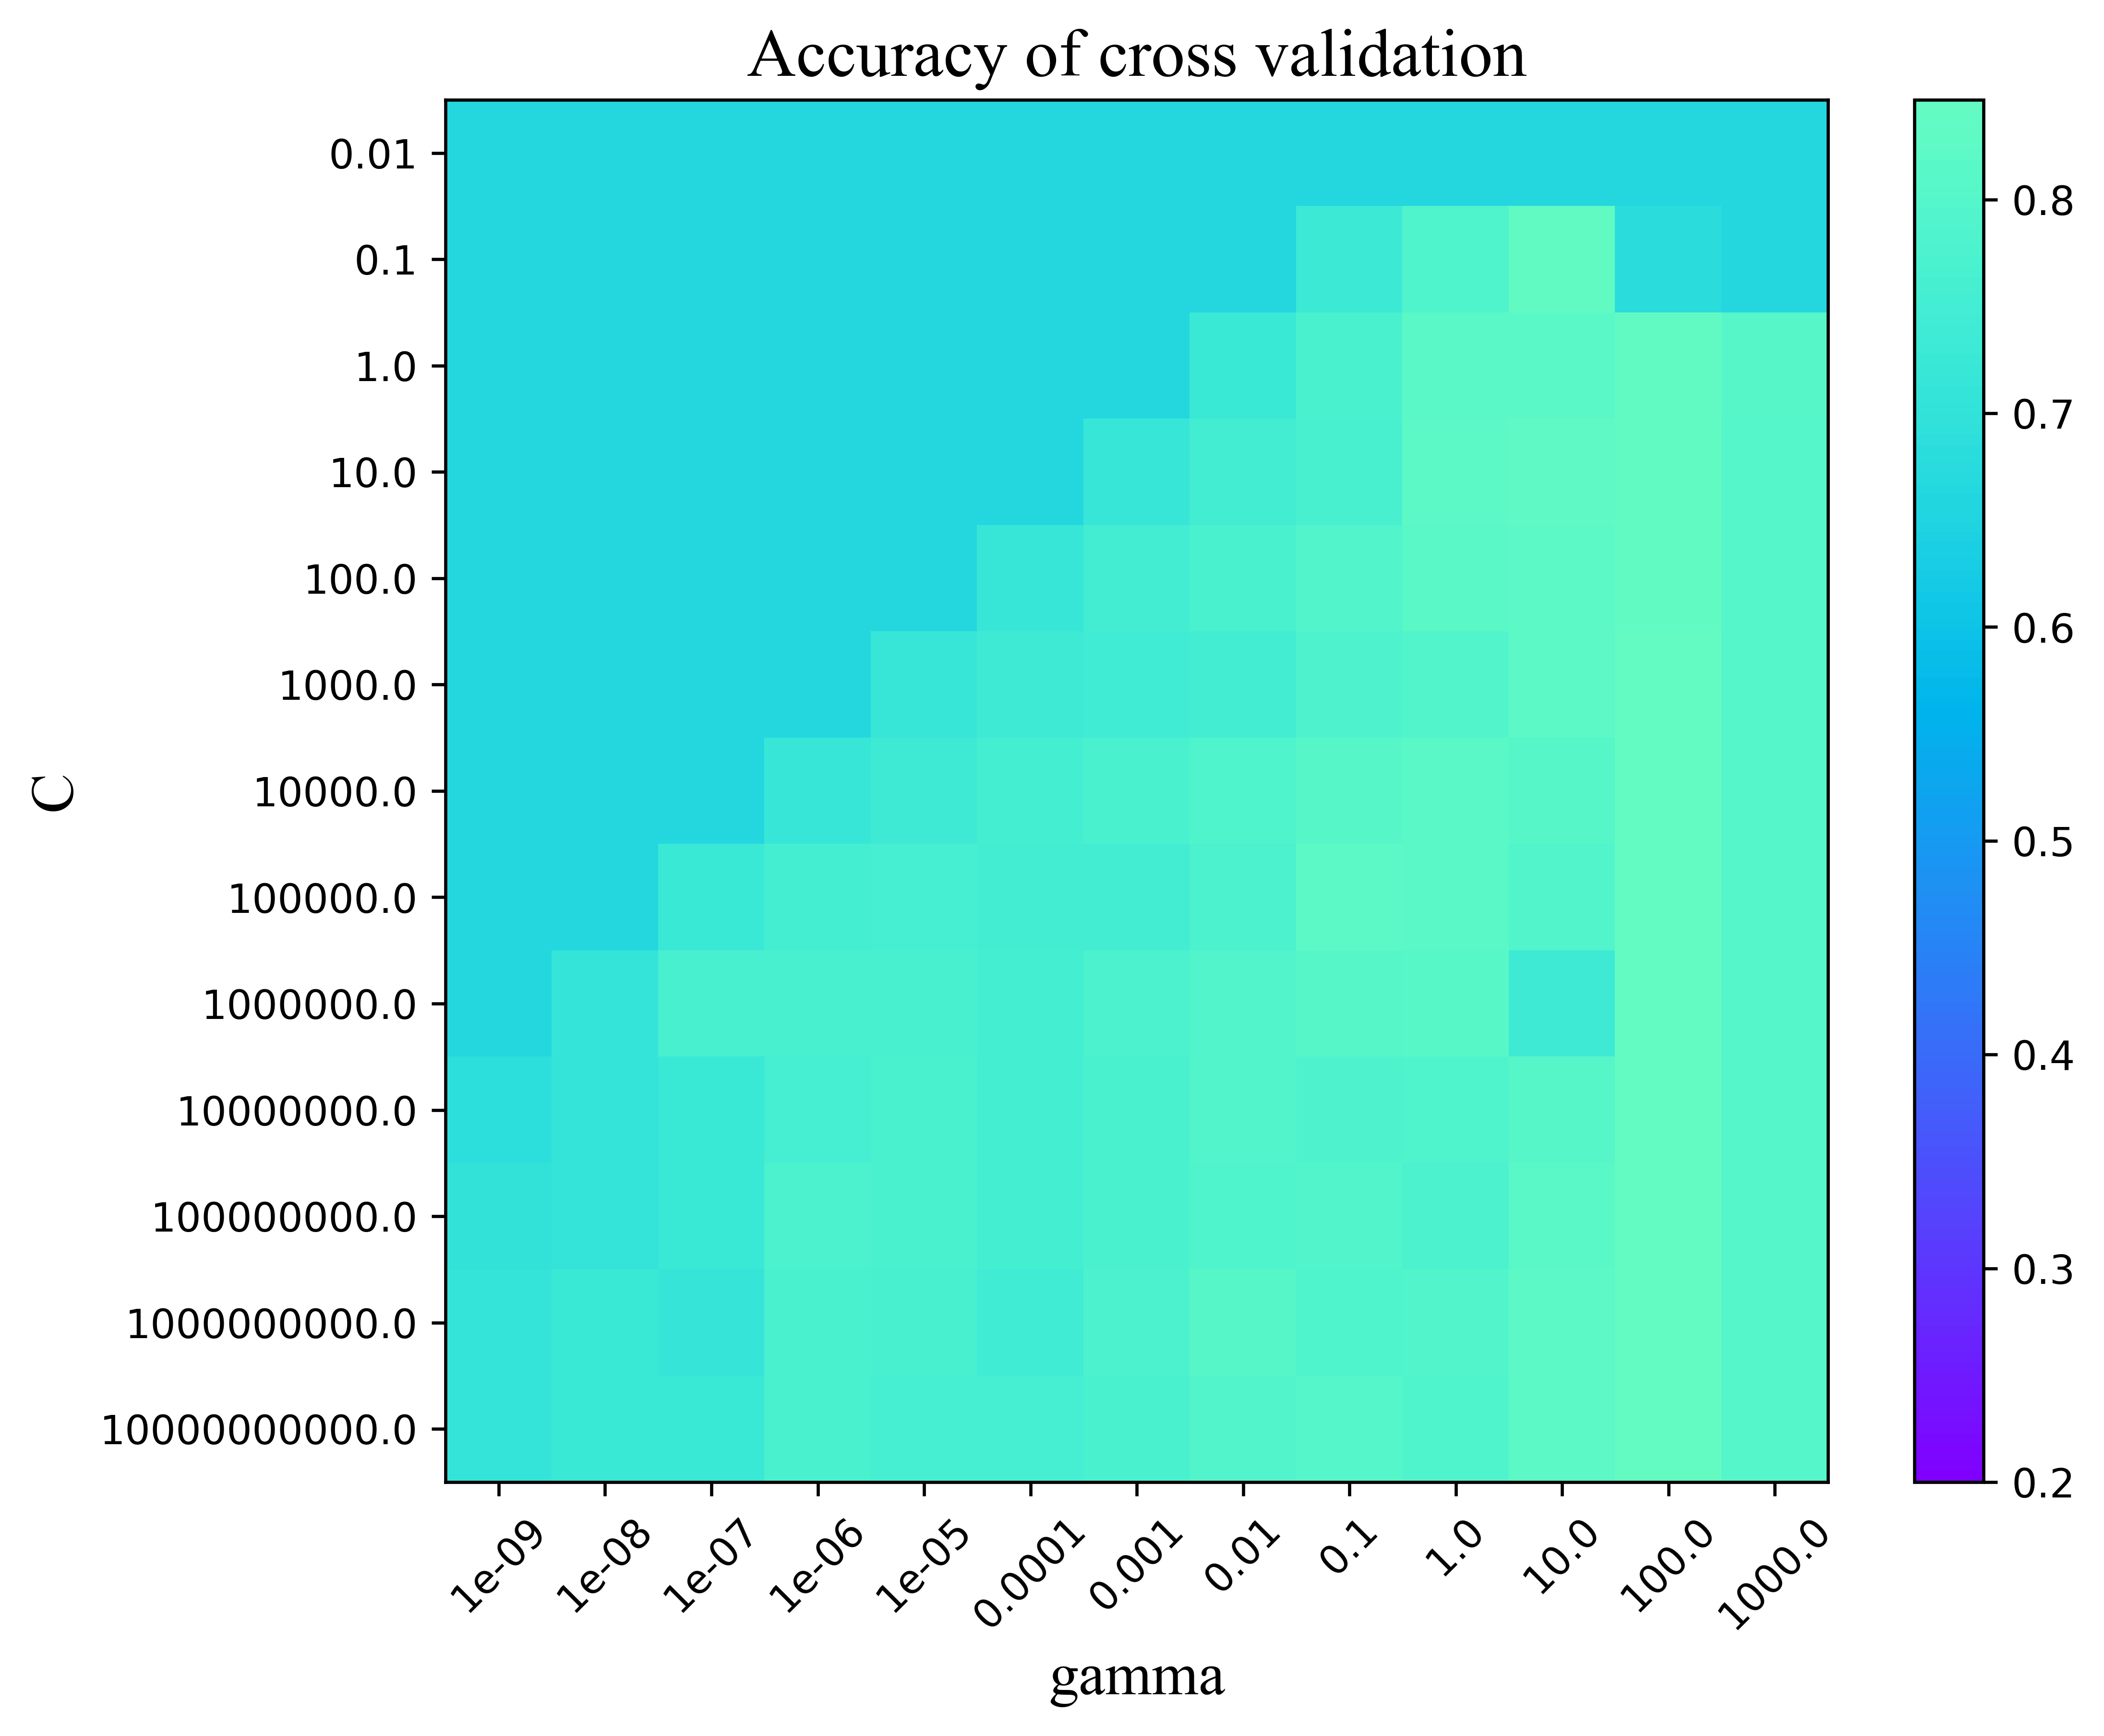

In [402]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.
#features_2 = pd.read_csv("https://raw.githubusercontent.com/QianjunjunLiu/MLProject_DATA/main/feature_all_miss_m.csv")
#X_2d = features.iloc[:, :2].values
#print(X_2d)
features1 = pd.read_csv("https://raw.githubusercontent.com/QianjunjunLiu/MLProject_DATA/main/resultfinal.csv")
#change feature
#X = features1[1:2].values
#X= features['Oil saturation','Total hydrocarbon (light hydrocarbon)']
#X= features[:,1]
X = features1.values
X_2d=X
#change feature
#print(X)
label_1 = pd.read_csv("https://raw.githubusercontent.com/QianjunjunLiu/MLProject_DATA/main/label_2_miss.csv")
y = np.ravel(label_1.values)
y_2d =y

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
#print(X)
X_2d = scaler.fit_transform(X_2d)
# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6), dpi=600)
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
##    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
##    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
##              size='medium',fontname='Times New Roman')
##
##    # visualize parameter's effect on decision function
##    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
##    plt.scatter(0.3*X_2d[:, 0], 0.3*X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
##                edgecolors='k')
##    plt.xticks(())
##    plt.yticks(())
##    plt.axis('tight')
##    #plt.savefig("1.jpg")

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6),dpi=600)
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.rainbow,norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma',fontname='Times New Roman',fontsize=15)
plt.ylabel('C',fontname='Times New Roman',fontsize=15)

plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title(u'Accuracy of cross validation',fontproperties='Times New Roman',fontsize=17)
plt.savefig("rainbow.jpg")

### Analysis
The proper combination of C and gamma can obtai nmore efficient model. When C is large and gamma is small or C is small and gamma is large, the accuracy can be higher.

### 1.4 Gamma and C’s influence on classification
In order to show the influence of the combination of C and gamma on the boundary of the model, 9 combinations were formed by taking 3 values of C and gamma respectively.

The best parameters are {'C': 10000.0, 'gamma': 100.0} with a score of 0.85


Text(0.5, 1.0, 'Validation accuracy')

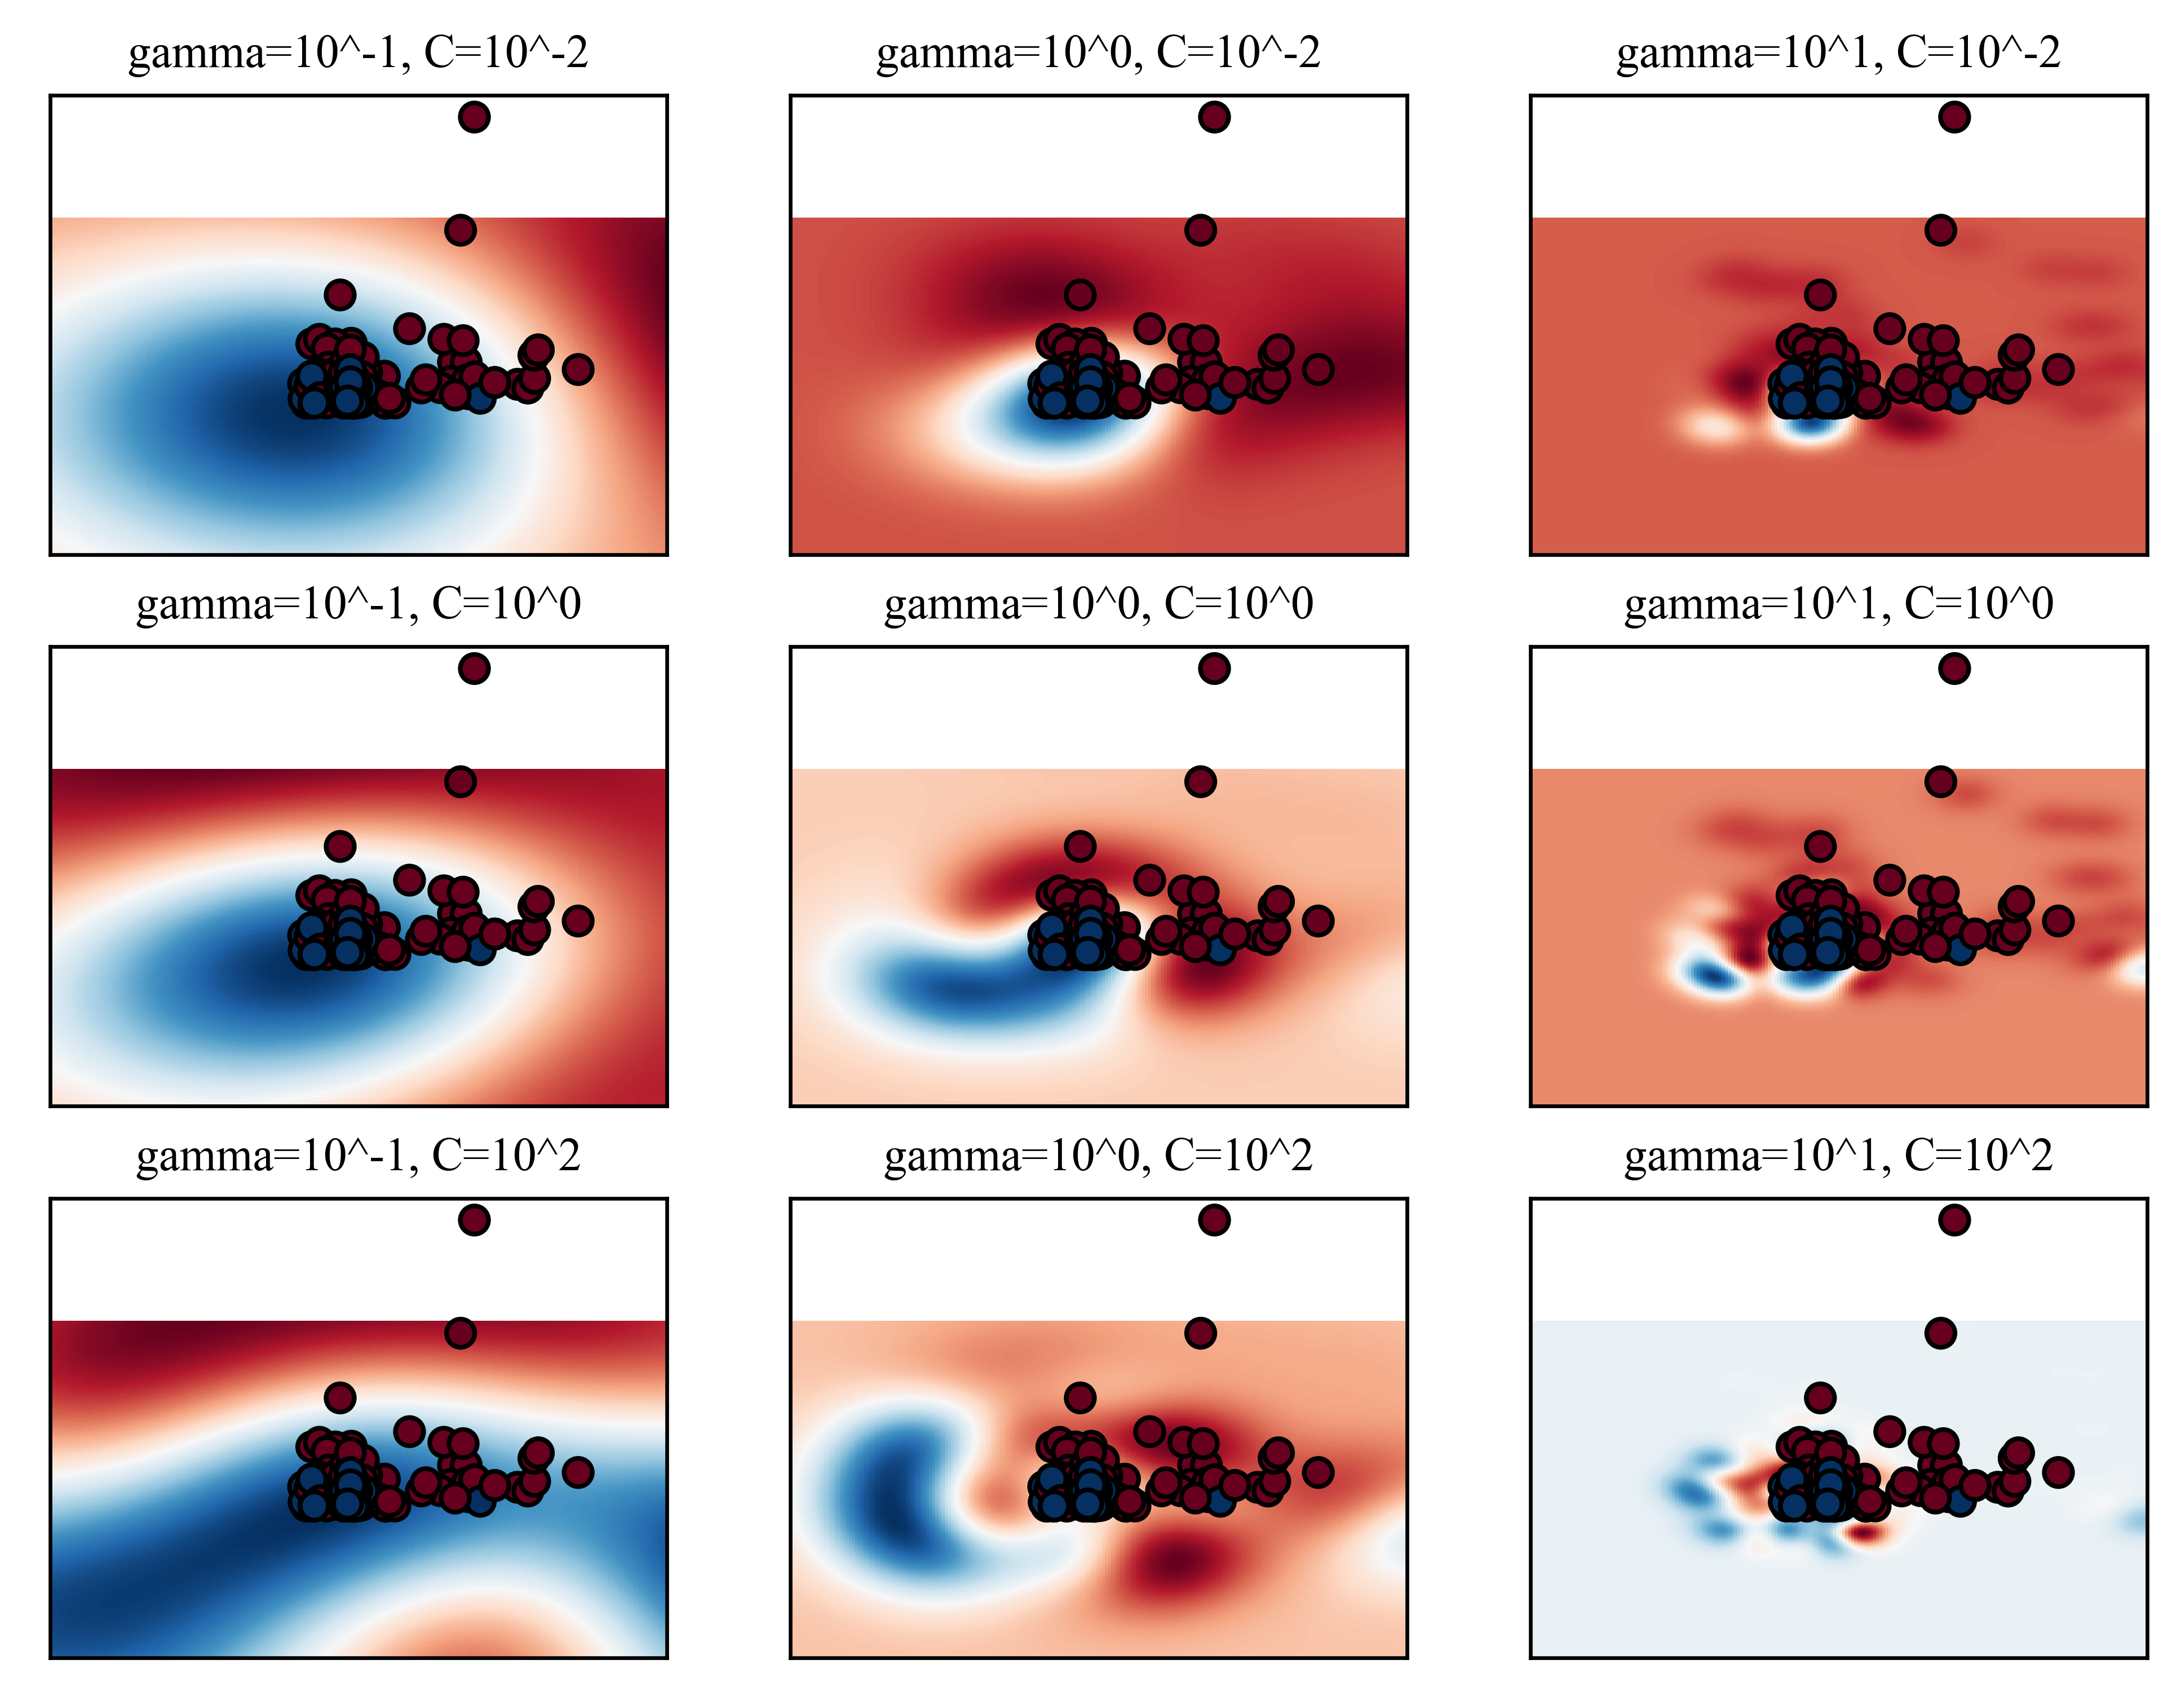

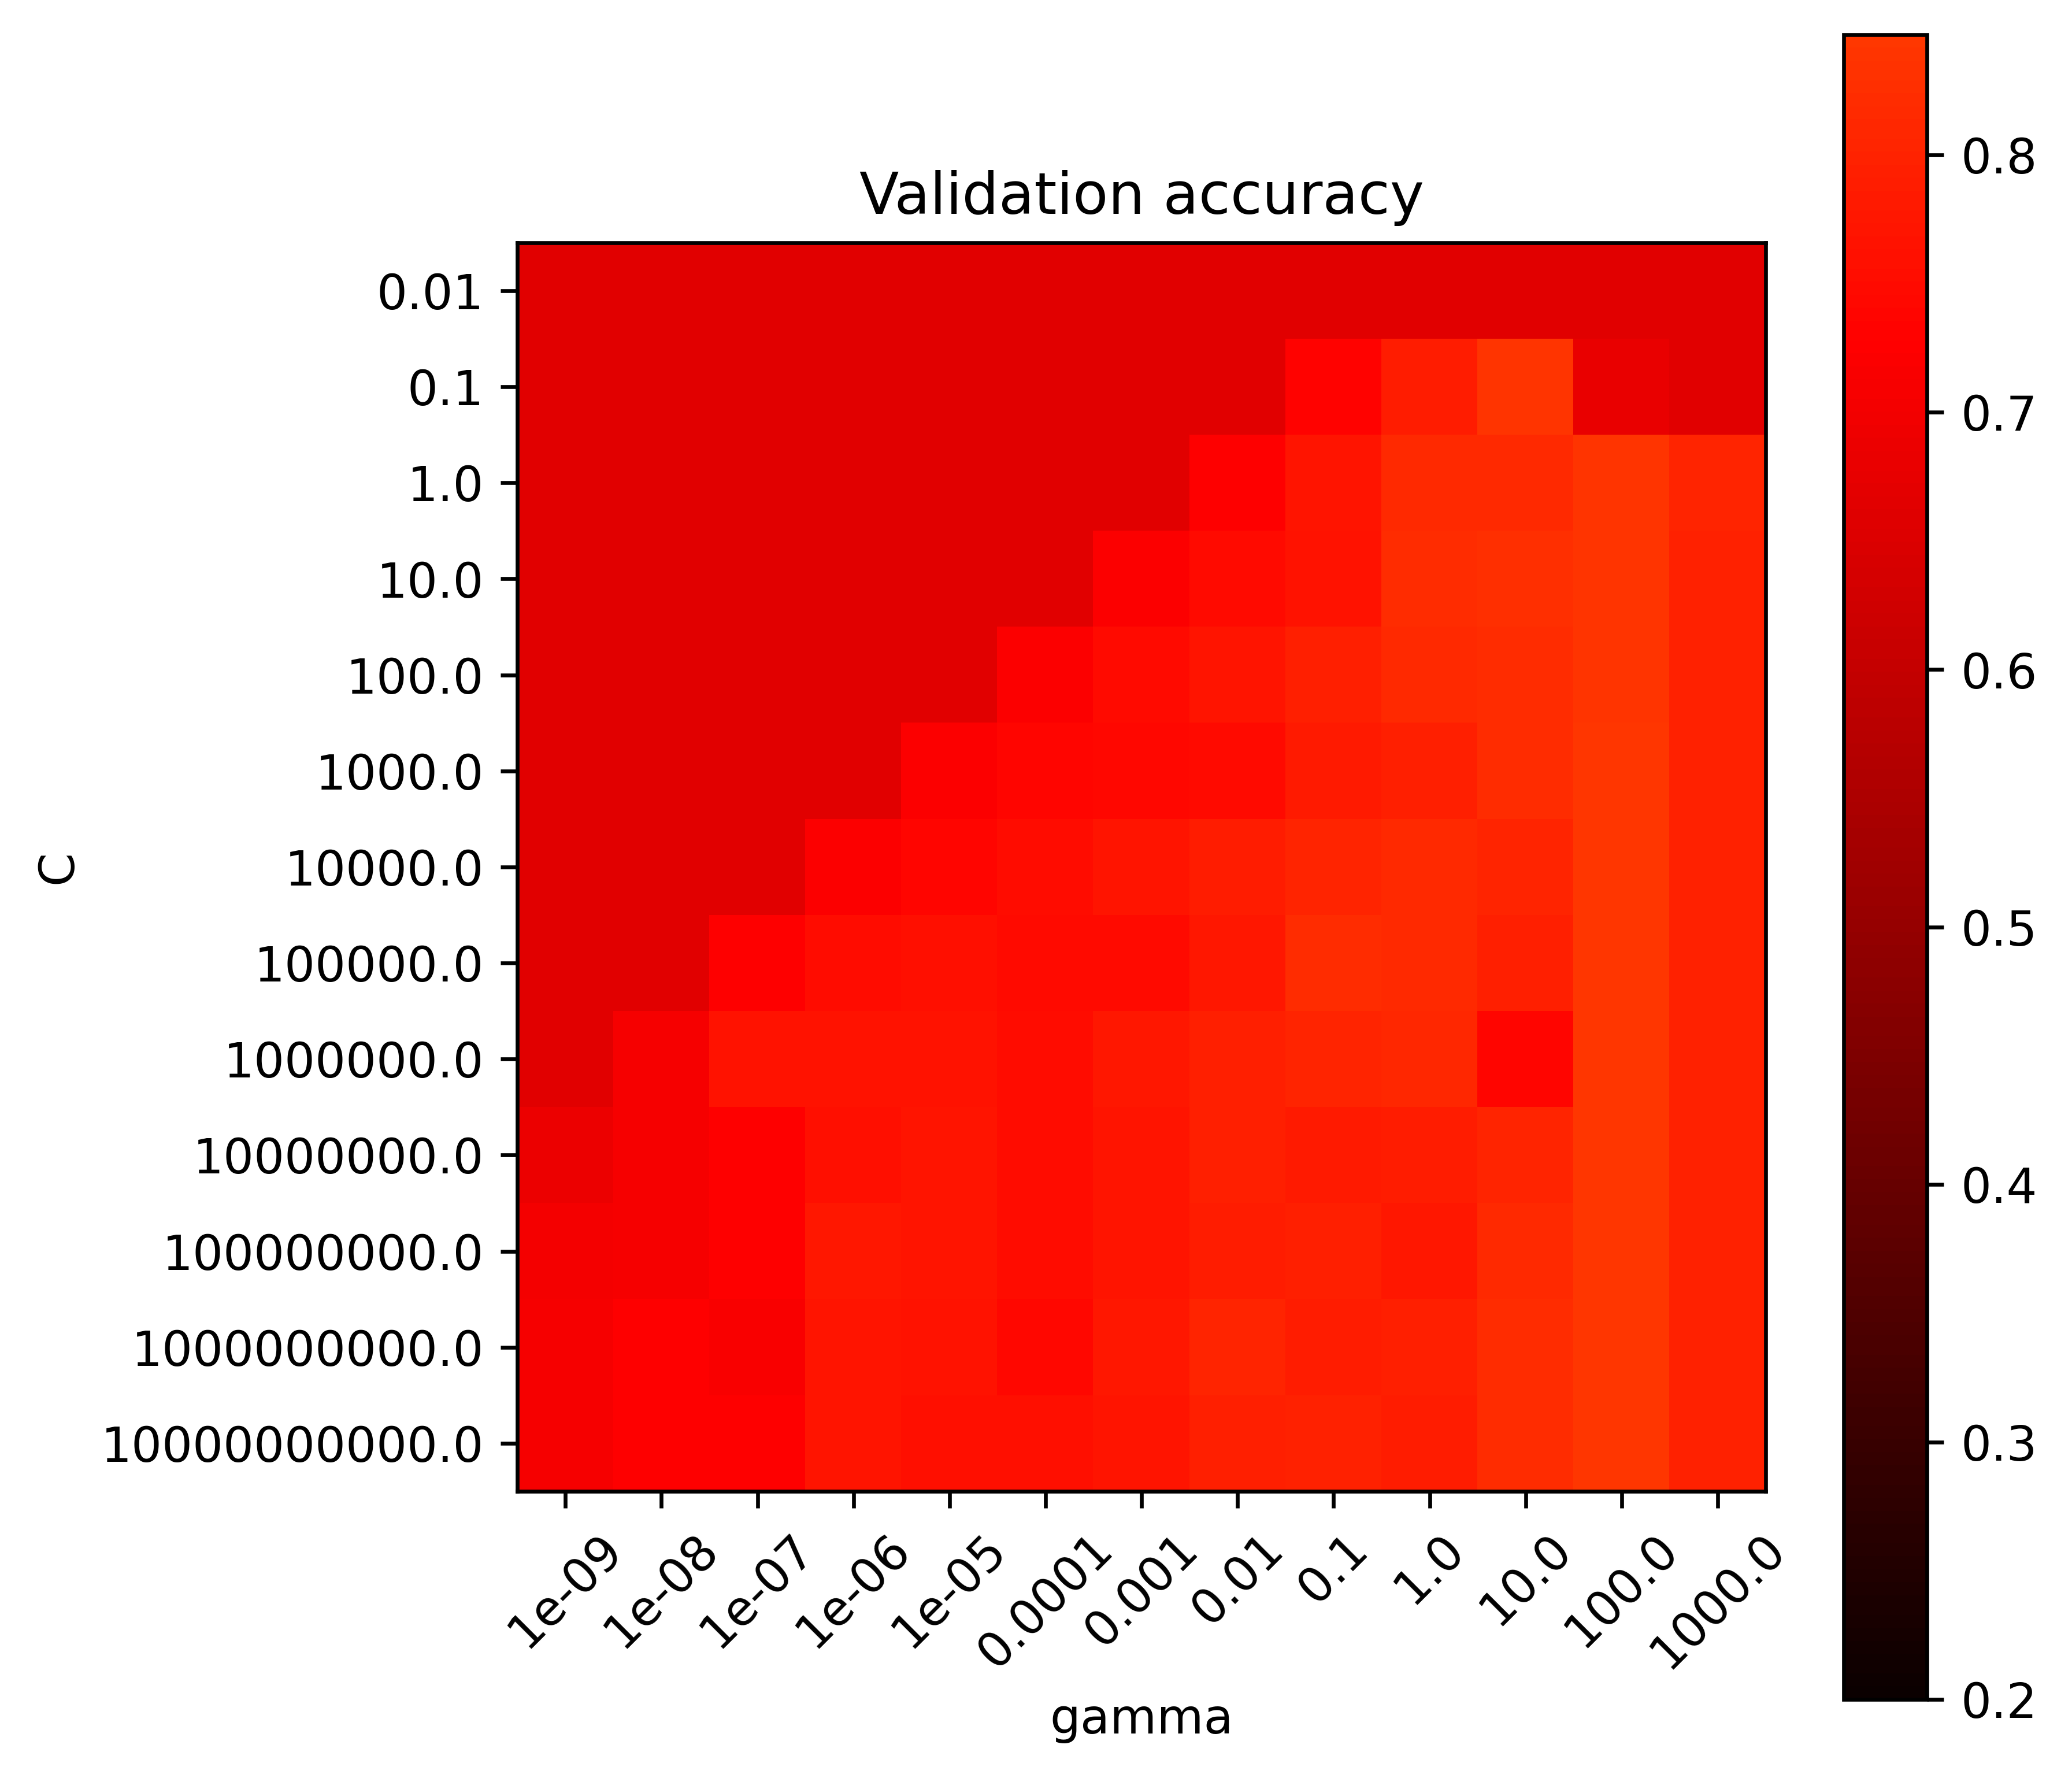

In [403]:
# Utility function of middlepoints in colormapclass MidpointNormalize(Normalize):
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

#conduct data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

#using gridsearch to find the optimal combination of parameters
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Draw 2D demarcation boundary diagram with small range of C and gamma
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(8, 6), dpi=600)
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # 用决策决策函数评价
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 作9个小图
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium',fontname='Times New Roman')

    # 将样本点画入
    plt.pcolormesh(2.5*xx, 2.5*yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    plt.savefig("nine.jpg")


scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

#Using heatmap to draw the influence of C and gamma combination on accuracy
plt.figure(figsize=(6, 6),dpi=600)
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')

### Analysis
From 27 features, oil saturation (NMR) and total hydrocarbon (light hydrocarbon) were selected as horizontal and vertical coordinates. In the figure, the red area represents the pure reservoir divided by the model, and the blue area represents the impure reservoir.

### 1.5 Influence of sample size
In order to study the influence of sample data numbers on the accuracy of the model, the former is taken from the sample data with an interval of 10, 100, 110, 120... , 300 data points as the new sample data.

            3             2
-5.346e-09 x + 3.223e-06 x - 0.0002106 x + 0.8164


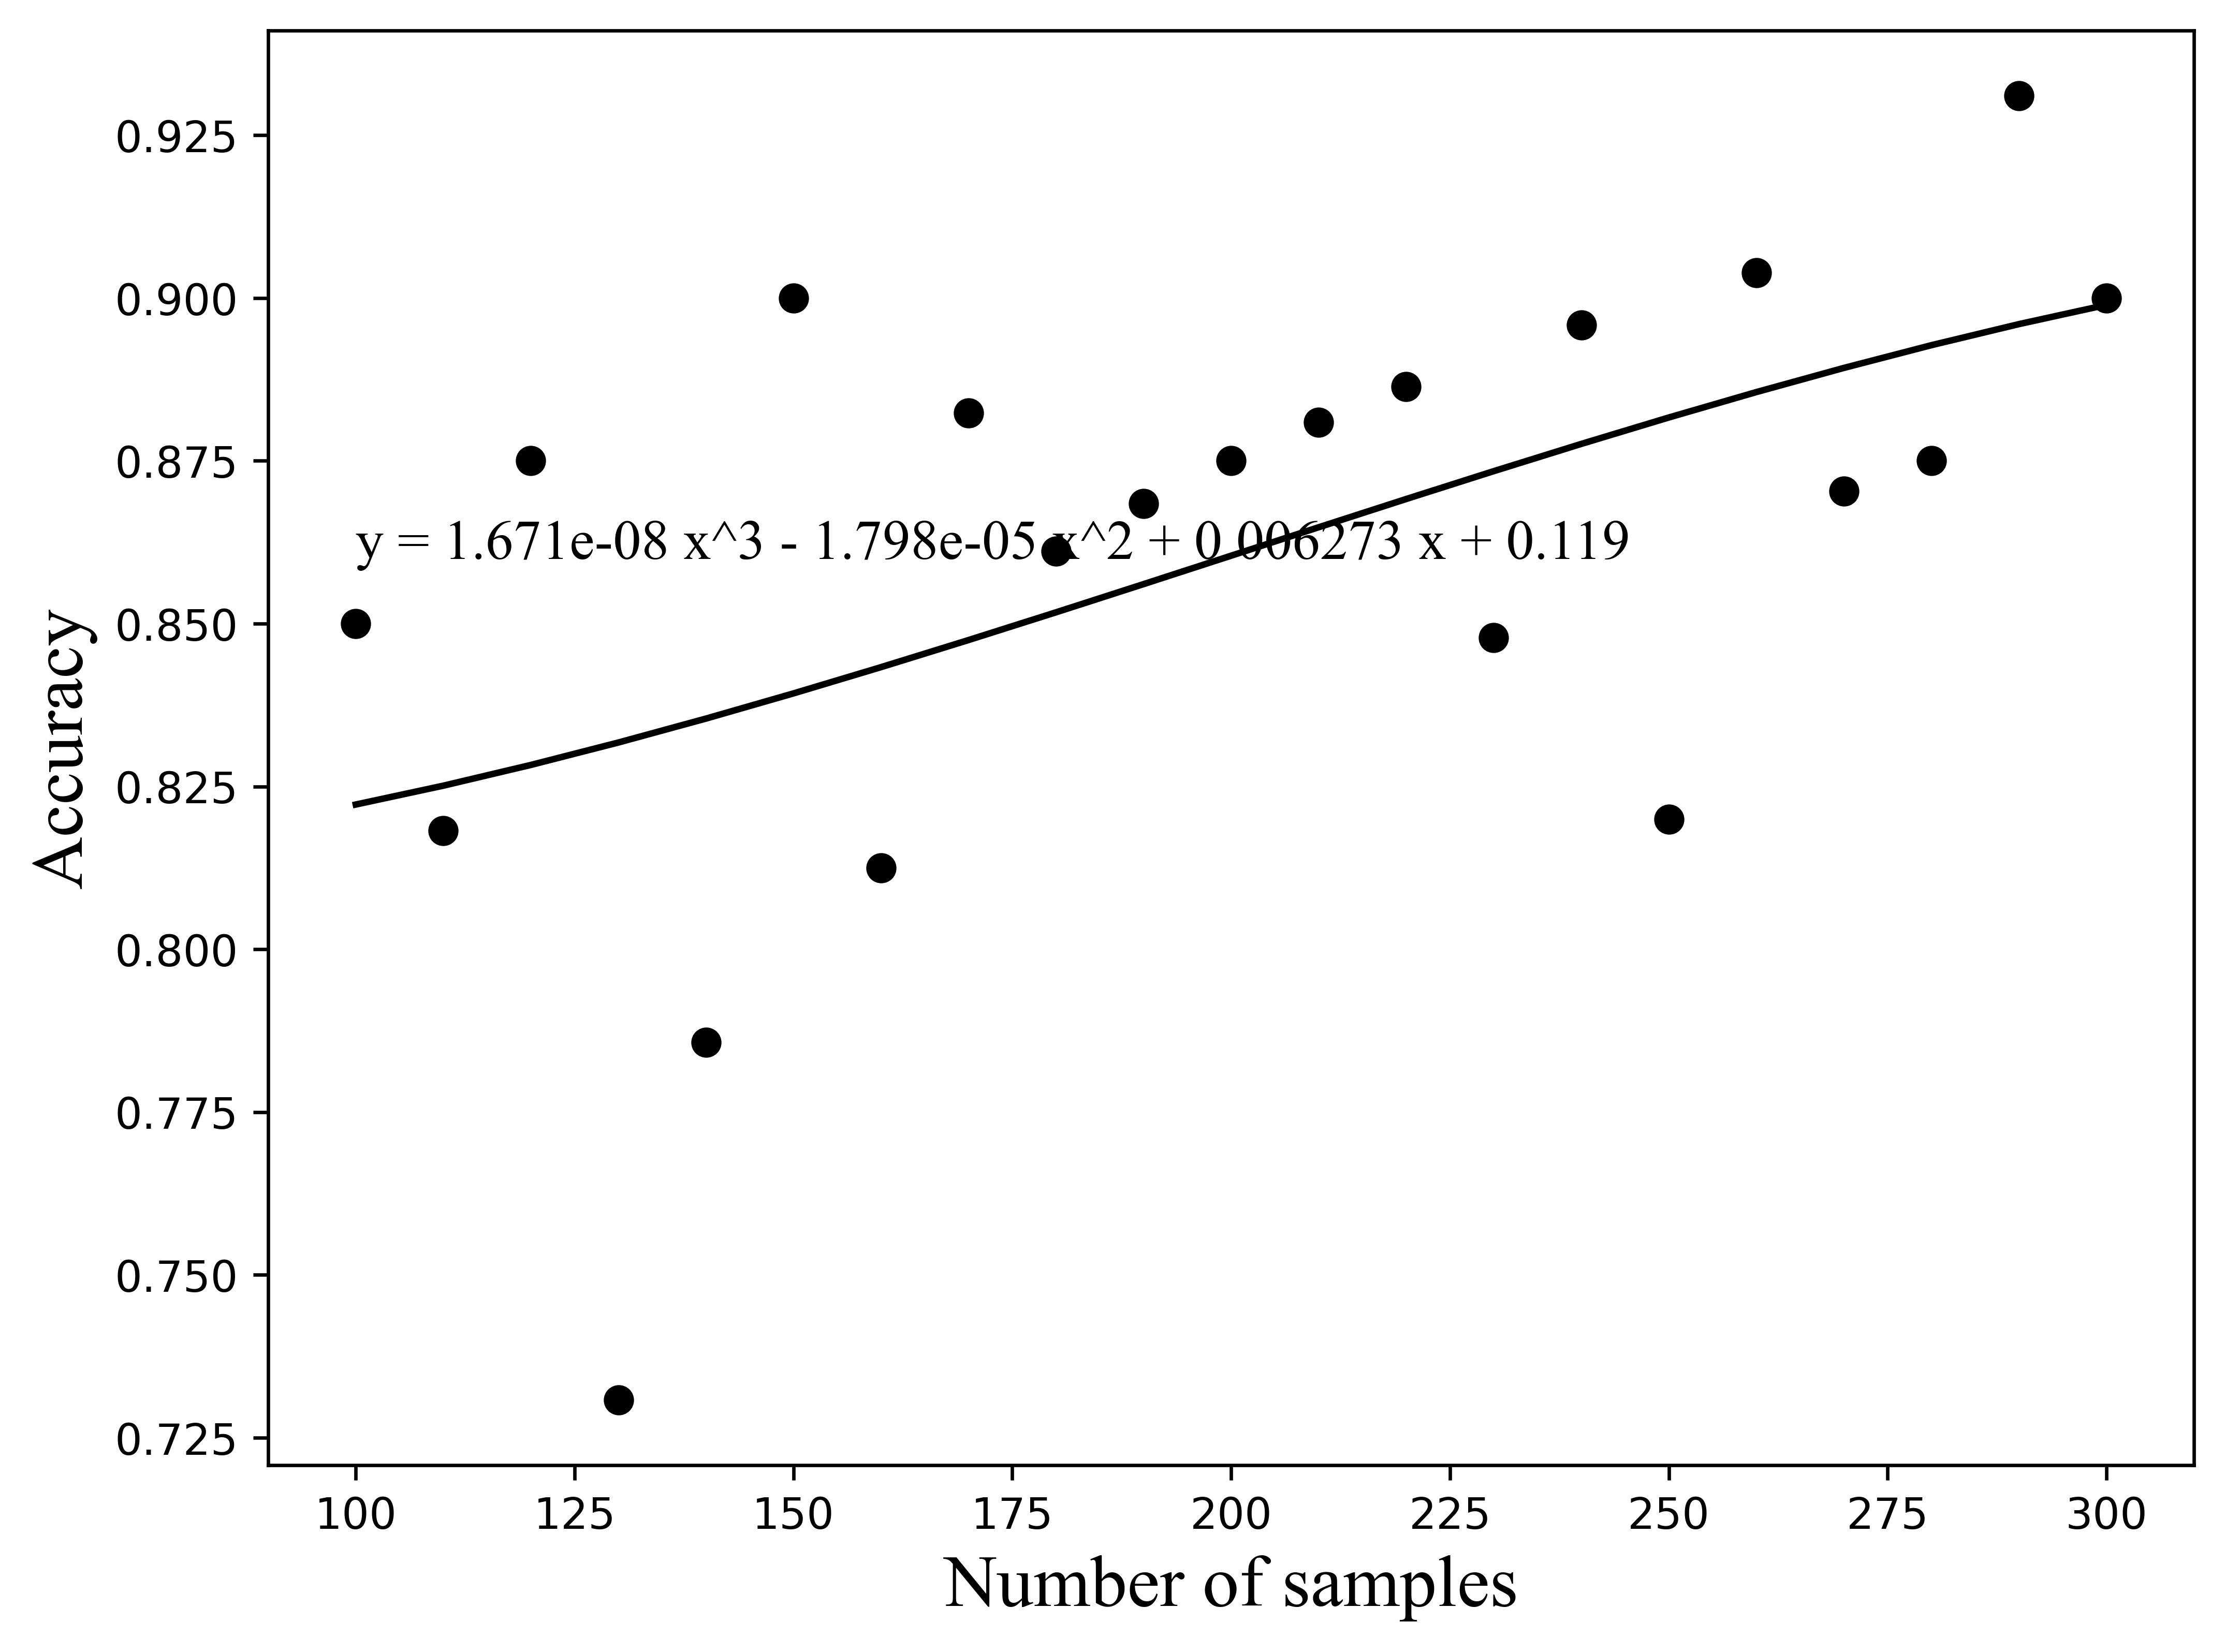

In [418]:
min_max_scaler = preprocessing.MinMaxScaler()
X2 = pd.DataFrame(min_max_scaler.fit_transform(X1),columns=None)

score_list=[]
leny=[]#different numbers of feature data
lenx=[]#different numbers of target data

#
for i in range(21):
    # Start with 100 data and increase in steps of 10 to 300
    line=(i)*10+100
    
    X_train, X_test, y_train, y_test = train_test_split(
    X2.iloc[0:line,:], y[0:line], test_size=0.20, random_state=81)
    leny.append(len(y[0:line]))
    lenx.append(len(X2.iloc[0:line,:]))

    #training data
    param_grid = {'C':[1,    10,   100, 200,  1e3 ,1e4],
              'gamma': [ 0.001, 0.05,  0.01,  0.1,   1,10] }
    clf = GridSearchCV(SVC(kernel='rbf'), param_grid,cv=5)
    clf = clf.fit(X_train, y_train)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)

    #prediction
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred,zero_division=0))
    score = clf.score(X_test, y_test)
    score_list.append(score)
    
    #print ("score is: " + str(score))
print('===================================================================')

#print("Average score is: " + str(sum_score/10))
#print()
#print (score_list)
#print(lenx)
#print(leny)
#print()
#print("max score is: "+ str(max(max_list)))

#the relationship between the number of samples and the accuracy
fig, axes = plt.subplots(figsize=(8,6),dpi=600)
axes.scatter(lenx,score_list,marker='o',color='black')
z1=np.polyfit(lenx,score_list,3)
p1 =np.poly1d(z1)
yvals=p1(lenx)
axes.plot(lenx,yvals,color = 'black')
axes.text(100, 0.86, ('y = 1.671e-08 x^3 - 1.798e-05 x^2 + 0.006273 x + 0.119  '),ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
axes.set_xlabel(u'Number of samples',fontsize=17,fontproperties='Times New Roman')
axes.set_ylabel(u'Accuracy',fontsize=17,fontproperties='Times New Roman')
print(p1)

plt.show()

### Analysis
As the number of samples increases, the accuracy increases gradually in the form of fluctuations.

### 2. Random forest
Based on the data, the random forest model is established and the influence of each parameter on the model is analyzed.

### 2.1 Training data and testing data selesction
10 models is established using 80% training data,accuracy is calculated by the average accurancy of remaining 20% data of each model.

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state =81)

### 2.2 Influence of model parameters on prediction results

The main parameters of random forest model include n_estimators, max_depth, max_features,
min_samples_leaf, min_samples_split. Where, n_estimators is the number of decision trees established for the random forest.

### 2.2.1 Tune the parameter of Number of estimators

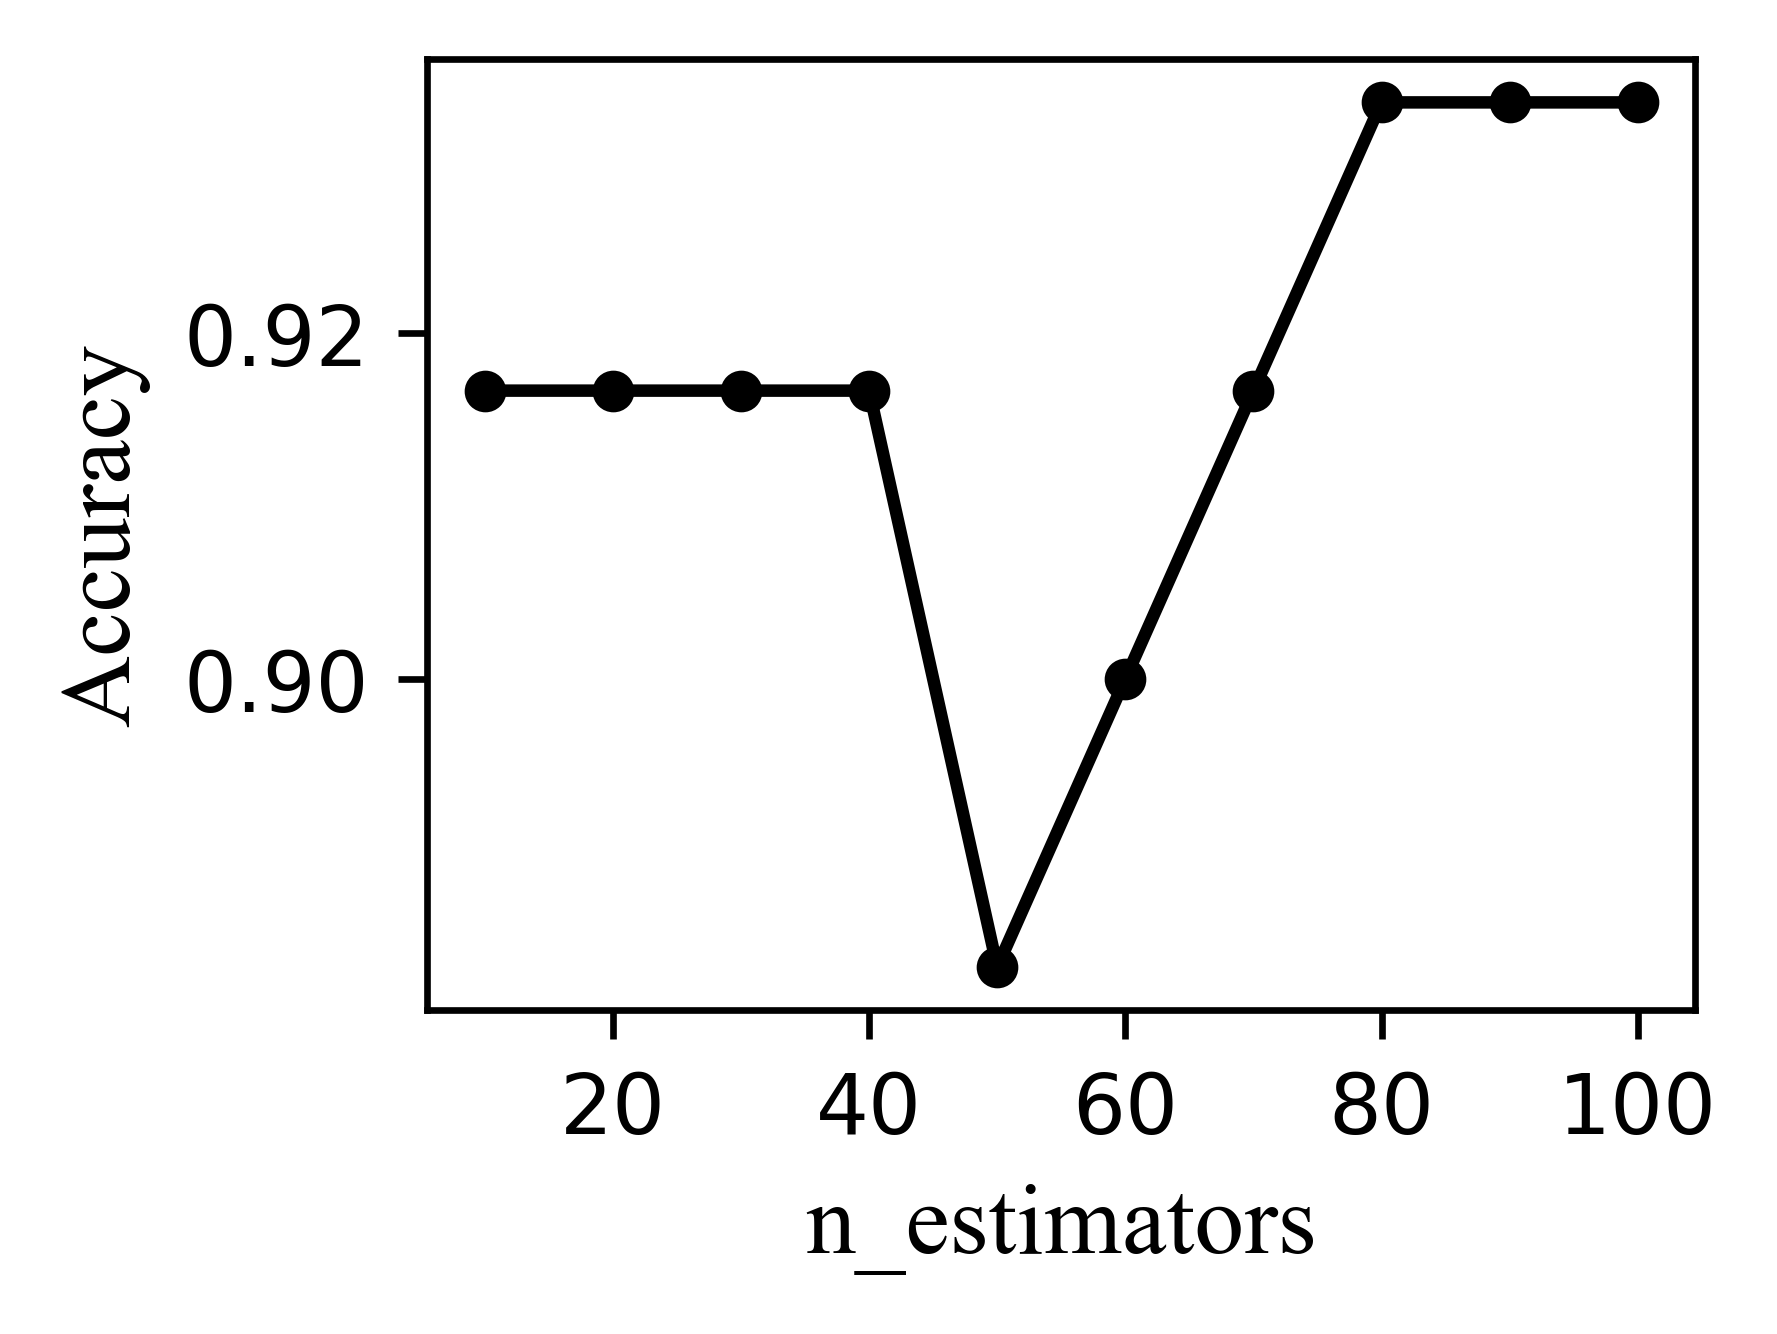

In [421]:
#The sample data set is divided into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state =81)
fig=plt.figure(figsize=(6,7),dpi=600)#设置绘图的画布
#%matplotlib inline
# The next five loops adjust the parameters n_estimator, max_depth, max_features, min_samples_leaf, min_samples_split

## Parameter of n_estimator
es_range= range(10,101,10)                   
score_list_1 = []                        
for n_estimators in es_range:

    #Establishing model parameters
    clf =RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=2, max_depth=6,
        max_features=8, min_samples_split=2, random_state=1)
                         
    #training model 
    clf.fit(X_train,y_train)

    #Prediction model
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))Display the forecast result
    score = clf.score(X_test, y_test)#Accuracy of model
    score_list_1.append(score)
    #print ("score is(n_estimator): " + str(score))
    #print(clf.feature_importances_)Show the importance of features
#print('===================================================================')
max_score = max(score_list_1)#Find the maximum accuracy

index = score_list_1.index(max_score)#Find the position corresponding to the highest predicted score
best_estimator = es_range[index]#Find the parameter value corresponding to the highest score

#The horizontal coordinate is the value range of the parameter, and the vertical axis is the accuracy
ax1=fig.add_subplot(321)
ax1.plot(es_range,score_list_1,color = 'black',marker='o',markersize=4)
ax1.set_xlabel('n_estimators',fontsize=12,fontproperties='Times New Roman')
ax1.set_ylabel(u'Accuracy',fontsize=12,fontproperties='Times New Roman')
#ax1.text(es_range[index],max_score, (es_range[index],max_score),# ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
print()
print()

### 2.2.2 Tune parameter of Maximum tree depth

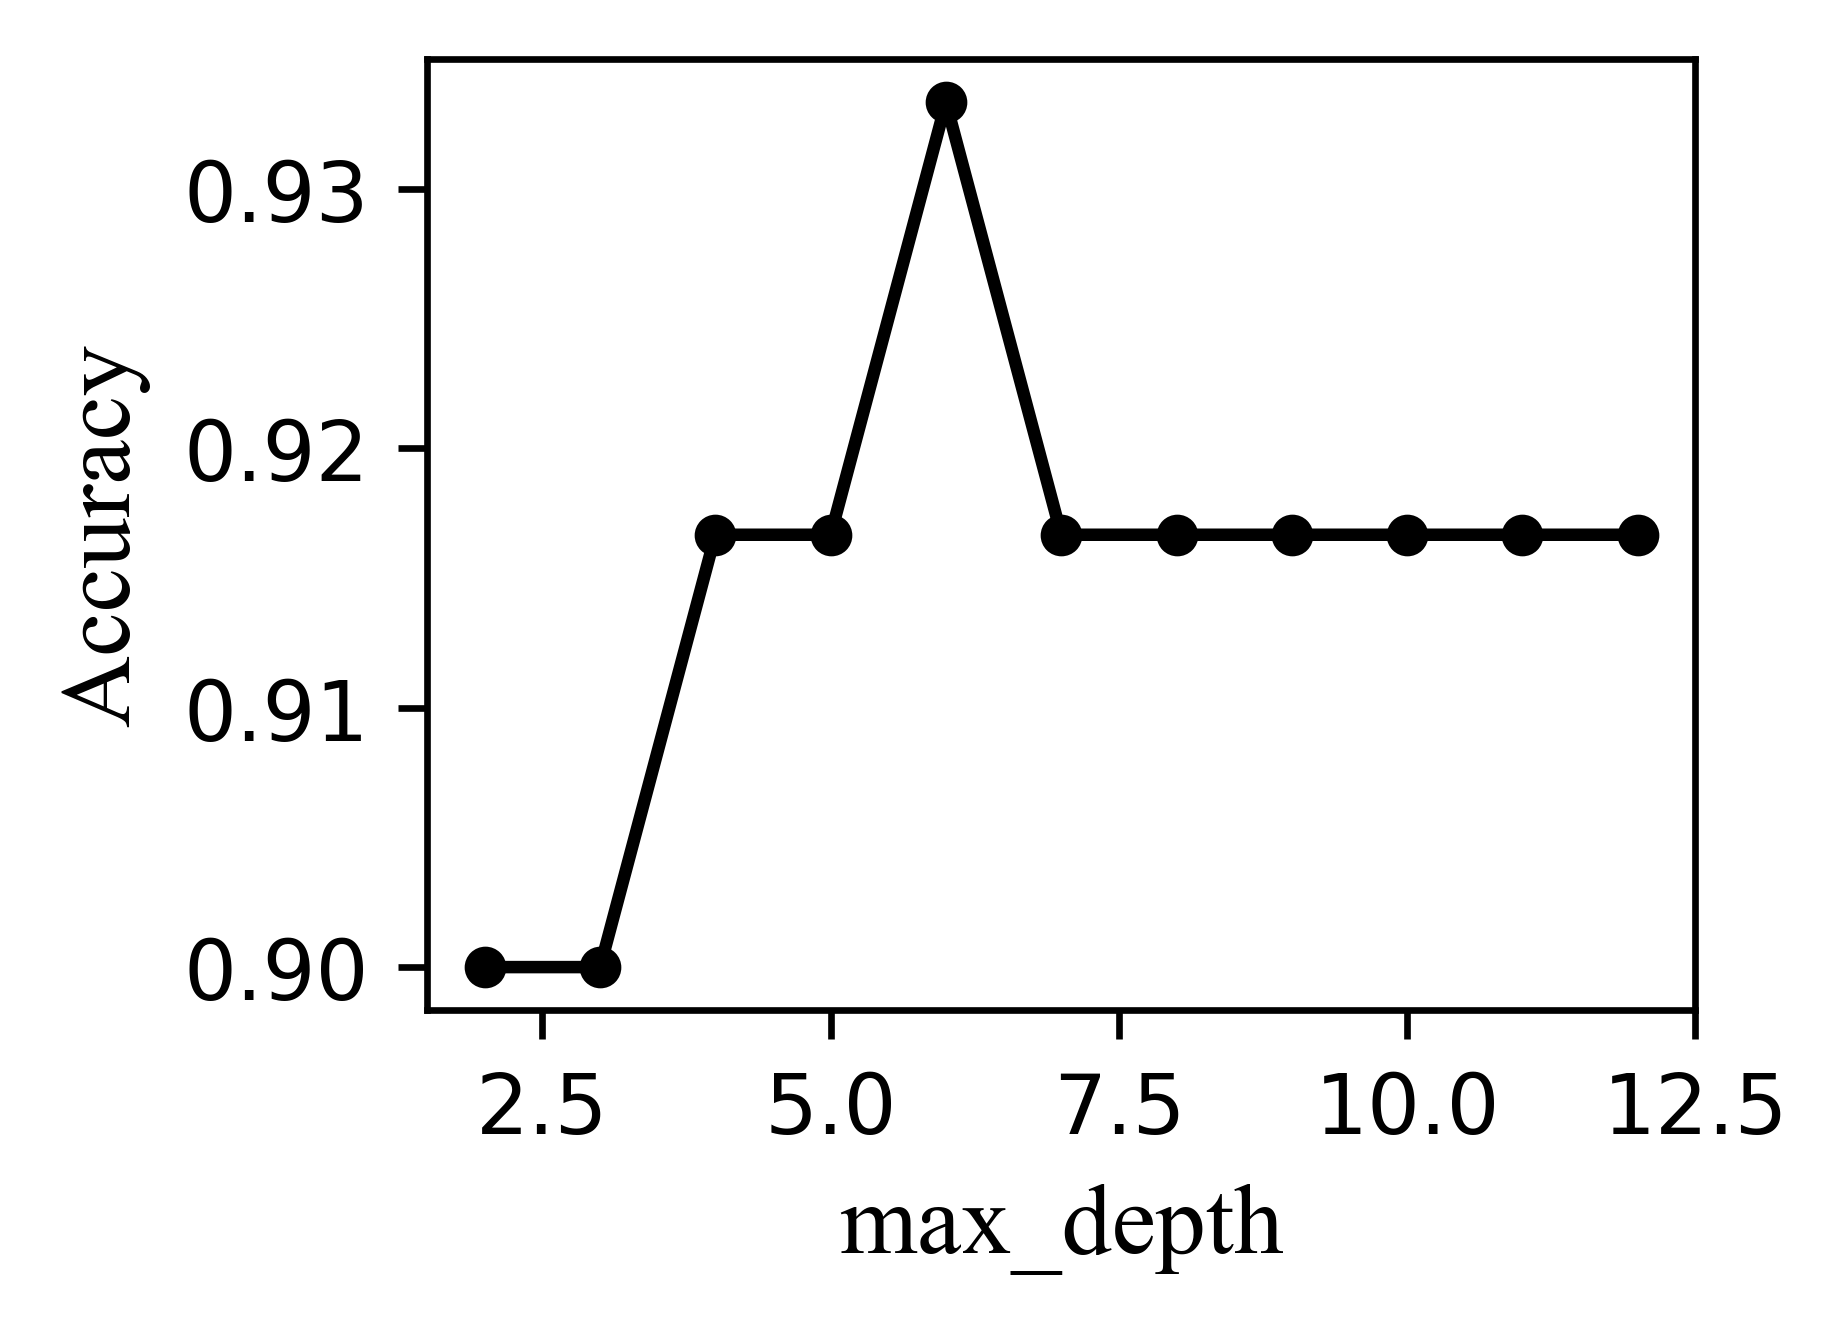

In [422]:
#parameter of Maximum tree depth
fig=plt.figure(figsize=(6,7),dpi=600)#设置绘图的画布
depth_range= range(2,13,1)                   
score_list_2= []                        
for max_depth in depth_range:
    #Build the model parameters and apply the optimal parameter values found in the previous loop
    clf =RandomForestClassifier(n_estimators=best_estimator, min_samples_leaf=2, max_depth=max_depth,
        max_features=6, min_samples_split=2, random_state=81)
                         
    #training model
    clf.fit(X_train,y_train)

    #prediction model
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
    score = clf.score(X_test, y_test)#Accuracy of model
    ##sum_score += score
    score_list_2.append(score)
    #print ("score is(max_depth): " + str(score))
    #print(clf.feature_importances_)
#print('===================================================================')
max_score = max(score_list_2)#Find the maximum accuracy
index = score_list_2.index(max_score)#Find the position corresponding to the highest score
best_depth = depth_range[index]#Find the parameter value corresponding to the highest score

#The horizontal coordinate is the value range of the parameter, and the vertical axis is the accuracy
ax2=fig.add_subplot(322)
ax2.plot(depth_range,score_list_2,color = 'black',marker='o',markersize=4)
ax2.set_xlabel('max_depth',fontsize=12,fontproperties='Times New Roman')
ax2.set_ylabel(u'Accuracy',fontsize=12,fontproperties='Times New Roman')
#ax2.text(depth_range[index],max_score, (depth_range[index],max_score),
         # ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
print()
print()


### 2.2.3 Tune parameter of Maximum number of features

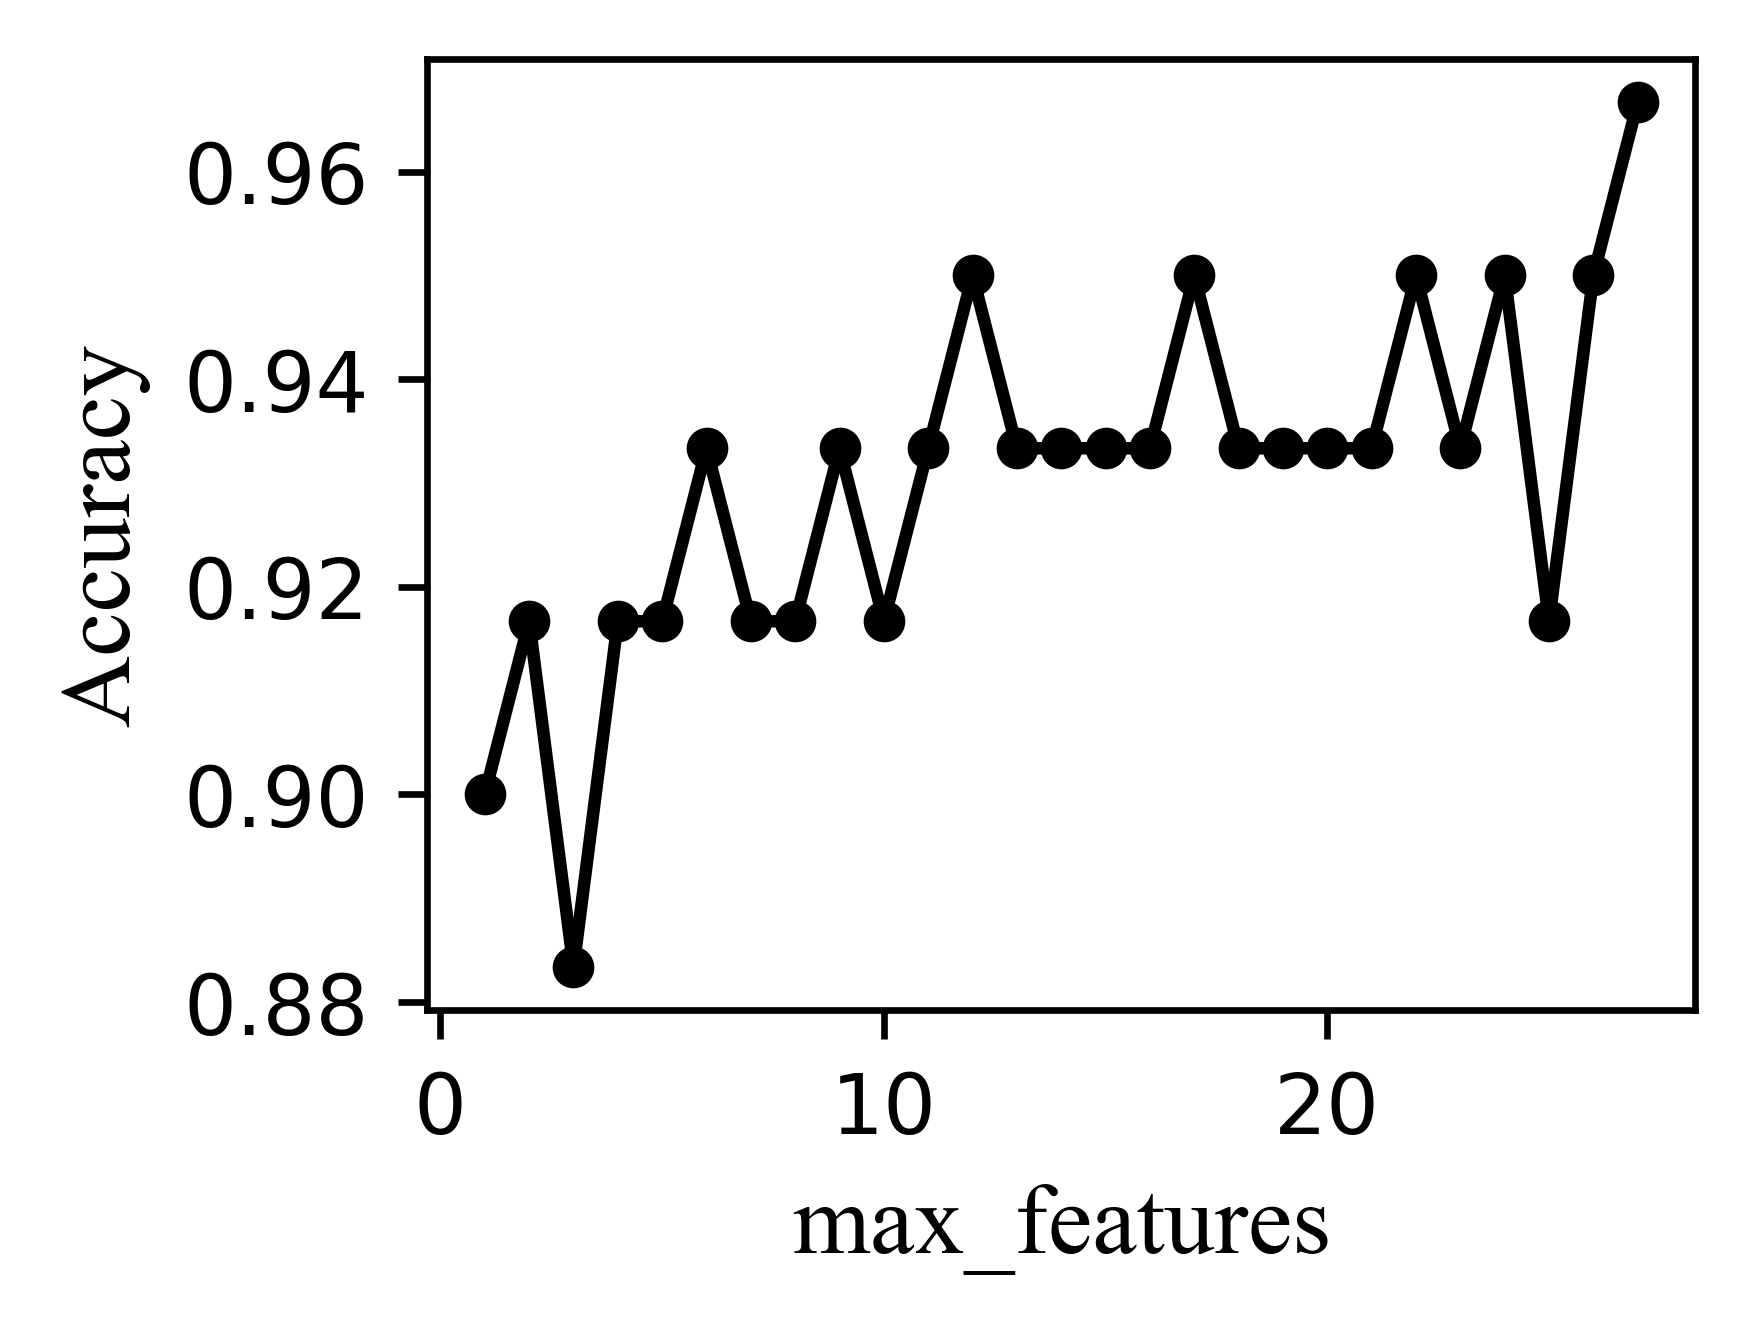

In [423]:
#parameter of Maximum number of features
fig=plt.figure(figsize=(6,7),dpi=600)#设置绘图的画布
features_range= range(1,28,1)                   
score_list_3= []                        
for max_features in features_range:
    #Build the model parameters and apply the optimal parameter values found in the previous loop
    clf =RandomForestClassifier(n_estimators=best_estimator, min_samples_leaf=2, max_depth=best_depth,
        max_features=max_features, min_samples_split=2, random_state=81)
                         
    #training model
    clf.fit(X_train,y_train)

    #prediction model
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
    score = clf.score(X_test, y_test)#model accurancy
    ##sum_score += score
    score_list_3.append(score)
    #print ("score is(max_features): " + str(score))
    #print(clf.feature_importances_)
#print('===================================================================')

max_score = max(score_list_3)#Find the maximum accuracy
index = score_list_3.index(max_score)#Find the position corresponding to the highest score
best_features = features_range[index]#Find the parameter value corresponding to the highest score

#The horizontal coordinate is the value range of the parameter, and the vertical axis is the accuracy
ax3=fig.add_subplot(323)
ax3.plot(features_range,score_list_3,color = 'black',marker='o',markersize=4)
ax3.set_xlabel('max_features',fontsize=12,fontproperties='Times New Roman')
ax3.set_ylabel(u'Accuracy',fontsize=12,fontproperties='Times New Roman')
#ax3.text(features_range[index],max_score, (features_range[index],max_score),#ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
print()
print()



### 2.2.4 Tune parameter of Leaf node's minimum sample

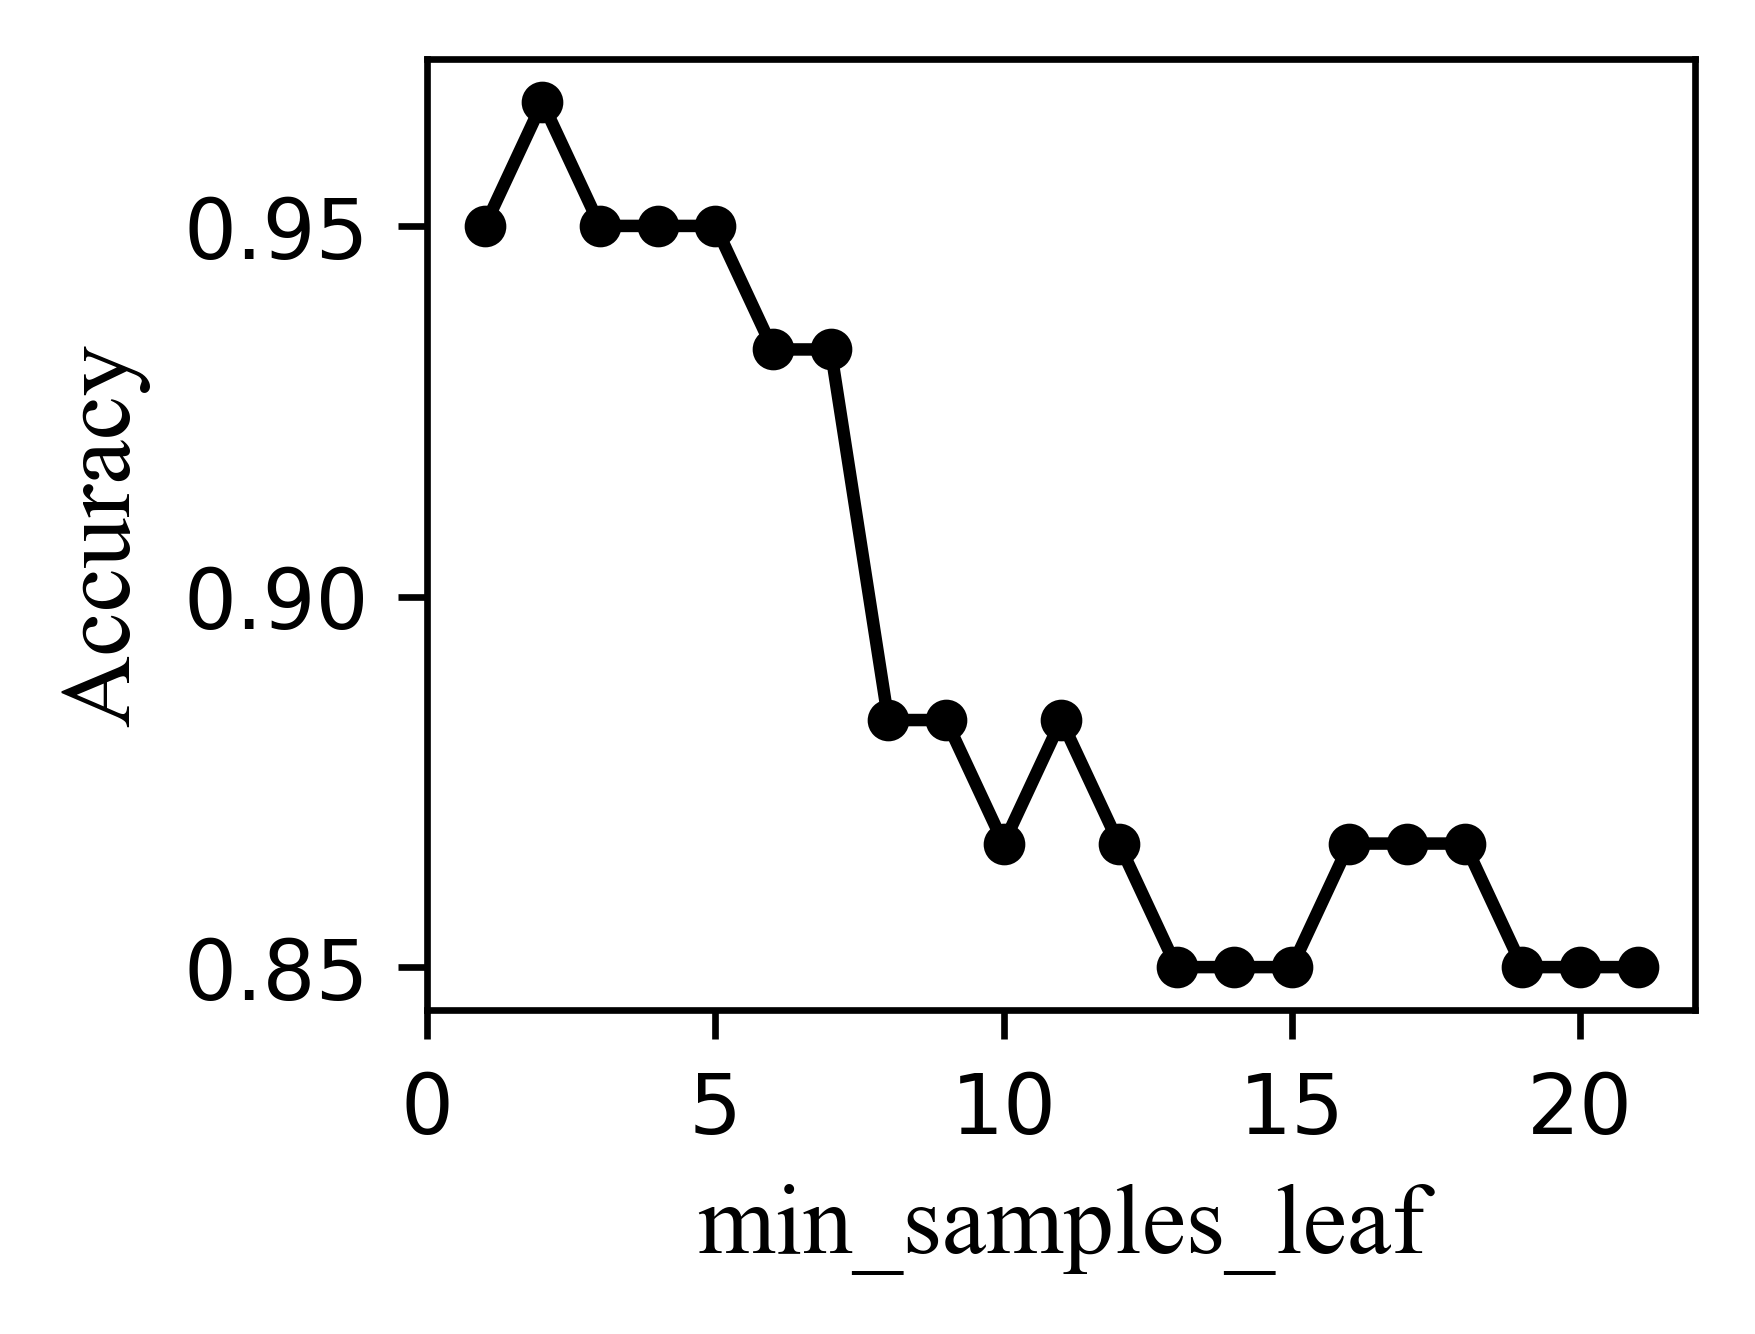

In [424]:
#parameter of Leaf node's minimum sample
fig=plt.figure(figsize=(6,7),dpi=600)#设置绘图的画布
min_samples_leaf_range= range(1,22,1)                   
score_list_4= []                        
for min_samples_leaf in min_samples_leaf_range:
    #Build the model parameters and apply the optimal parameter values found in the previous loop
    clf =RandomForestClassifier(n_estimators=best_estimator, min_samples_leaf=min_samples_leaf, max_depth=best_depth,
        max_features=best_features, min_samples_split=2, random_state=81)
                         
    #training model
    clf.fit(X_train,y_train)

    #prediction model
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
    score = clf.score(X_test, y_test)#model accurancy
    ##sum_score += score
    score_list_4.append(score)
    #print ("score is(min_samples_leaf): " + str(score))
    #print(clf.feature_importances_)
#print('===================================================================')

max_score = max(score_list_4)#Find the maximum accuracy
index = score_list_4.index(max_score)#Find the position corresponding to the highest score
best_min_samples_leaf = min_samples_leaf_range[index]#Find the parameter value corresponding to the highest score

#The horizontal coordinate is the value range of the parameter, and the vertical axis is the accuracy
ax4=fig.add_subplot(324)
ax4.plot(min_samples_leaf_range,score_list_4,color = 'black',marker='o',markersize=4)
ax4.set_xlabel('min_samples_leaf',fontsize=12,fontproperties='Times New Roman')
ax4.set_ylabel(u'Accuracy',fontsize=12,fontproperties='Times New Roman')
#ax4.text(min_samples_leaf_range[index],max_score, (min_samples_leaf_range[index],max_score),
          #ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
print()
print()
    


### 2.2.5 Tune parameter of Minimum number of samples required to split an internal node

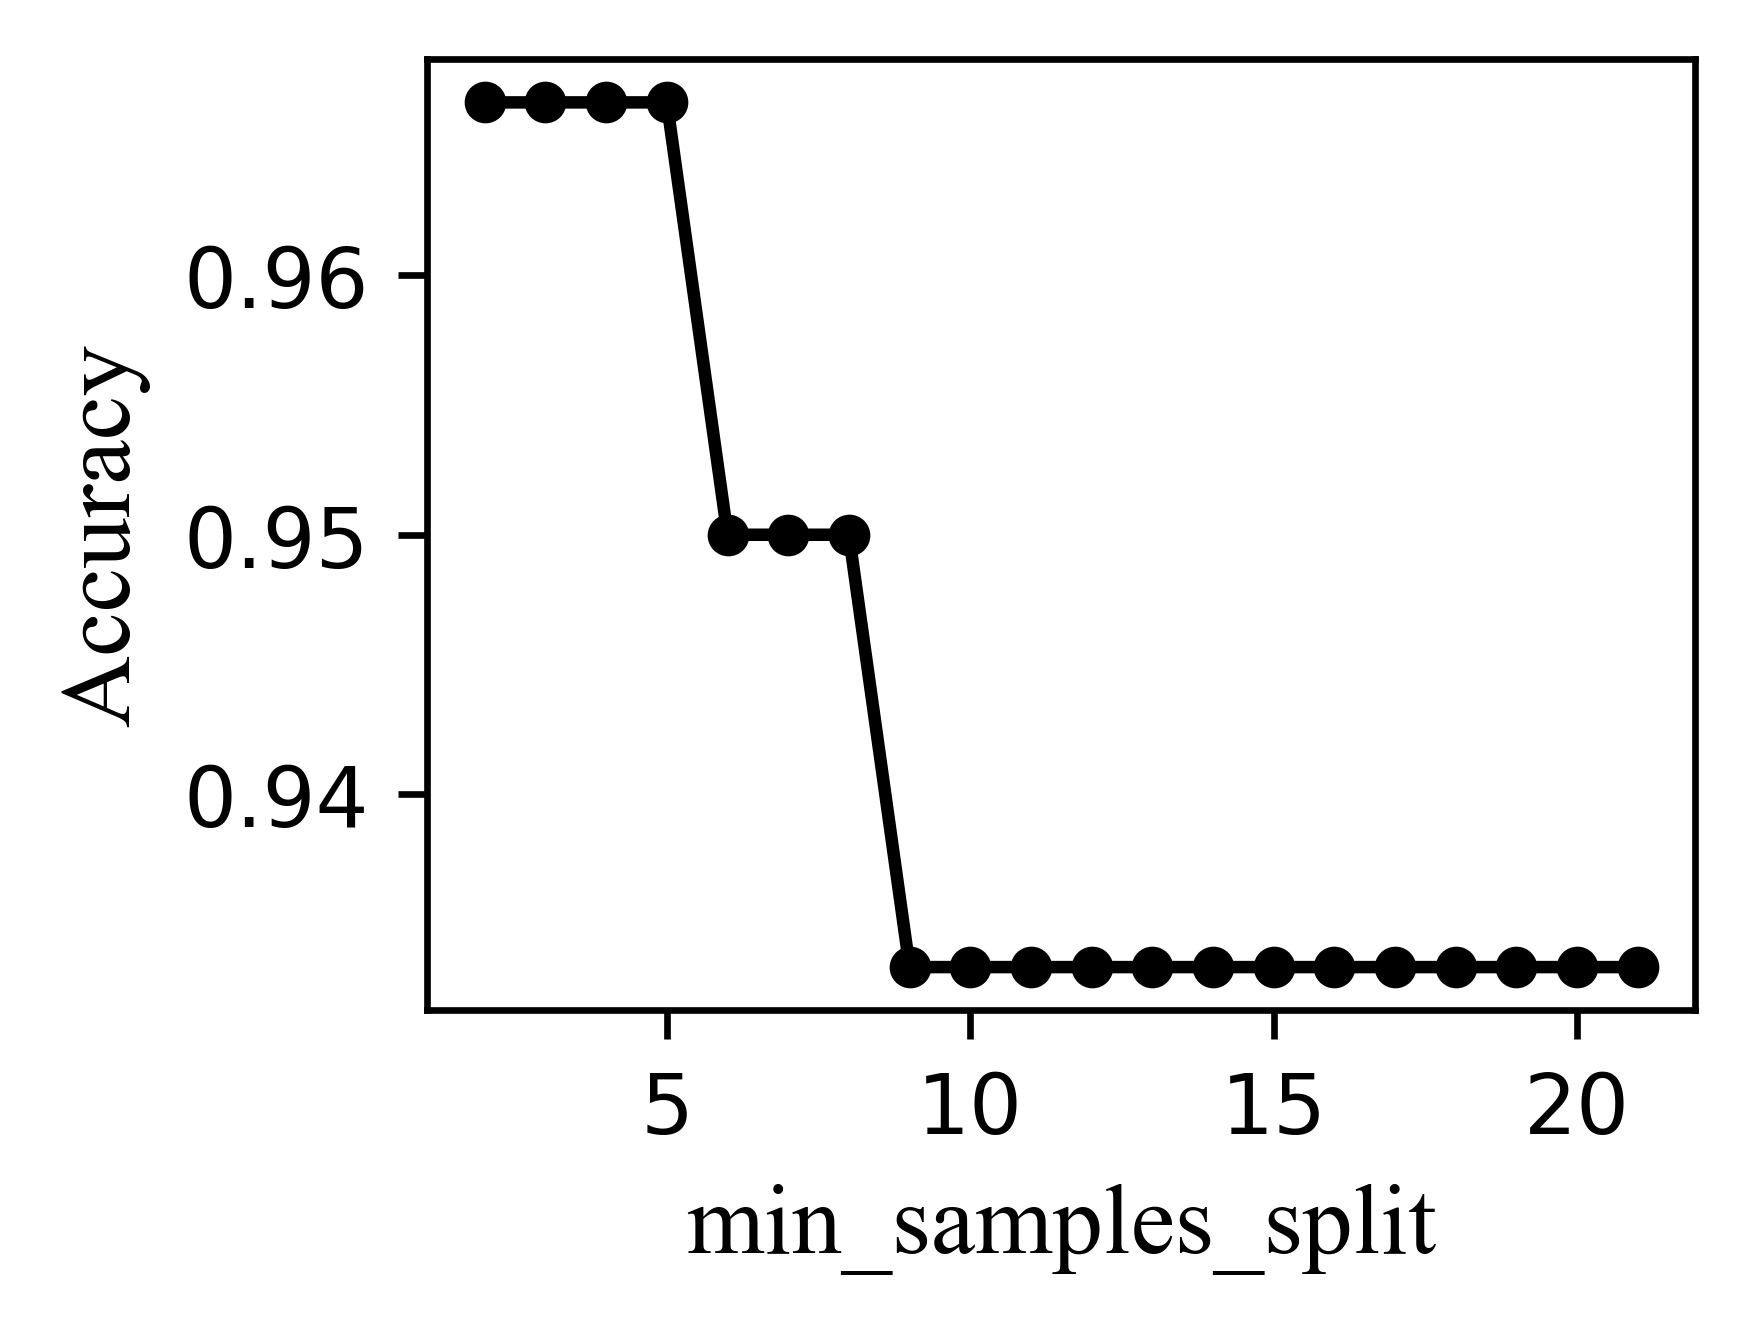

In [425]:
#parameter of Minimum number of samples required to split an internal node
fig=plt.figure(figsize=(6,7),dpi=600)#设置绘图的画布
min_samples_split_range= range(2,22,1)                   
score_list_5= []                        
for min_samples_split in min_samples_split_range:
    #Build the model parameters and apply the optimal parameter values found in the previous loop
    clf =RandomForestClassifier(n_estimators=best_estimator, min_samples_leaf=best_min_samples_leaf, max_depth=best_depth,
        max_features=best_features, min_samples_split=min_samples_split, random_state=81)
                         
    #training model
    clf.fit(X_train,y_train)

    #prediction model
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
    score = clf.score(X_test, y_test)#model accurancy
    ##sum_score += score
    score_list_5.append(score)
    #print ("score is(min_samples_split): " + str(score))
    #print(clf.feature_importances_)
#print('===================================================================')

max_score = max(score_list_5)#Find the maximum accuracy
index = score_list_5.index(max_score)#Find the position corresponding to the highest score
best_min_samples_split = min_samples_split_range[index]#Find the parameter value corresponding to the highest score

#The horizontal coordinate is the value range of the parameter, and the vertical axis is the accuracy
ax5=fig.add_subplot(325)
ax5.plot(min_samples_split_range,score_list_5,color = 'black',marker='o',markersize=4)
ax5.set_xlabel('min_samples_split',fontsize=12,fontproperties='Times New Roman')
ax5.set_ylabel(u'Accuracy',fontsize=12,fontproperties='Times New Roman')
#ax5.text(min_samples_split_range[index],max_score, (min_samples_split_range[index],max_score),# ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
print()
print()


### Analysis
The NE parameter is tuned first. The other parameters need to be fixed initially.Every time fix this optimal parameter and tune the next parameter.

### 2.3 Influence of sample size

            3             2
-3.589e-08 x + 2.094e-05 x - 0.00337 x + 1.004


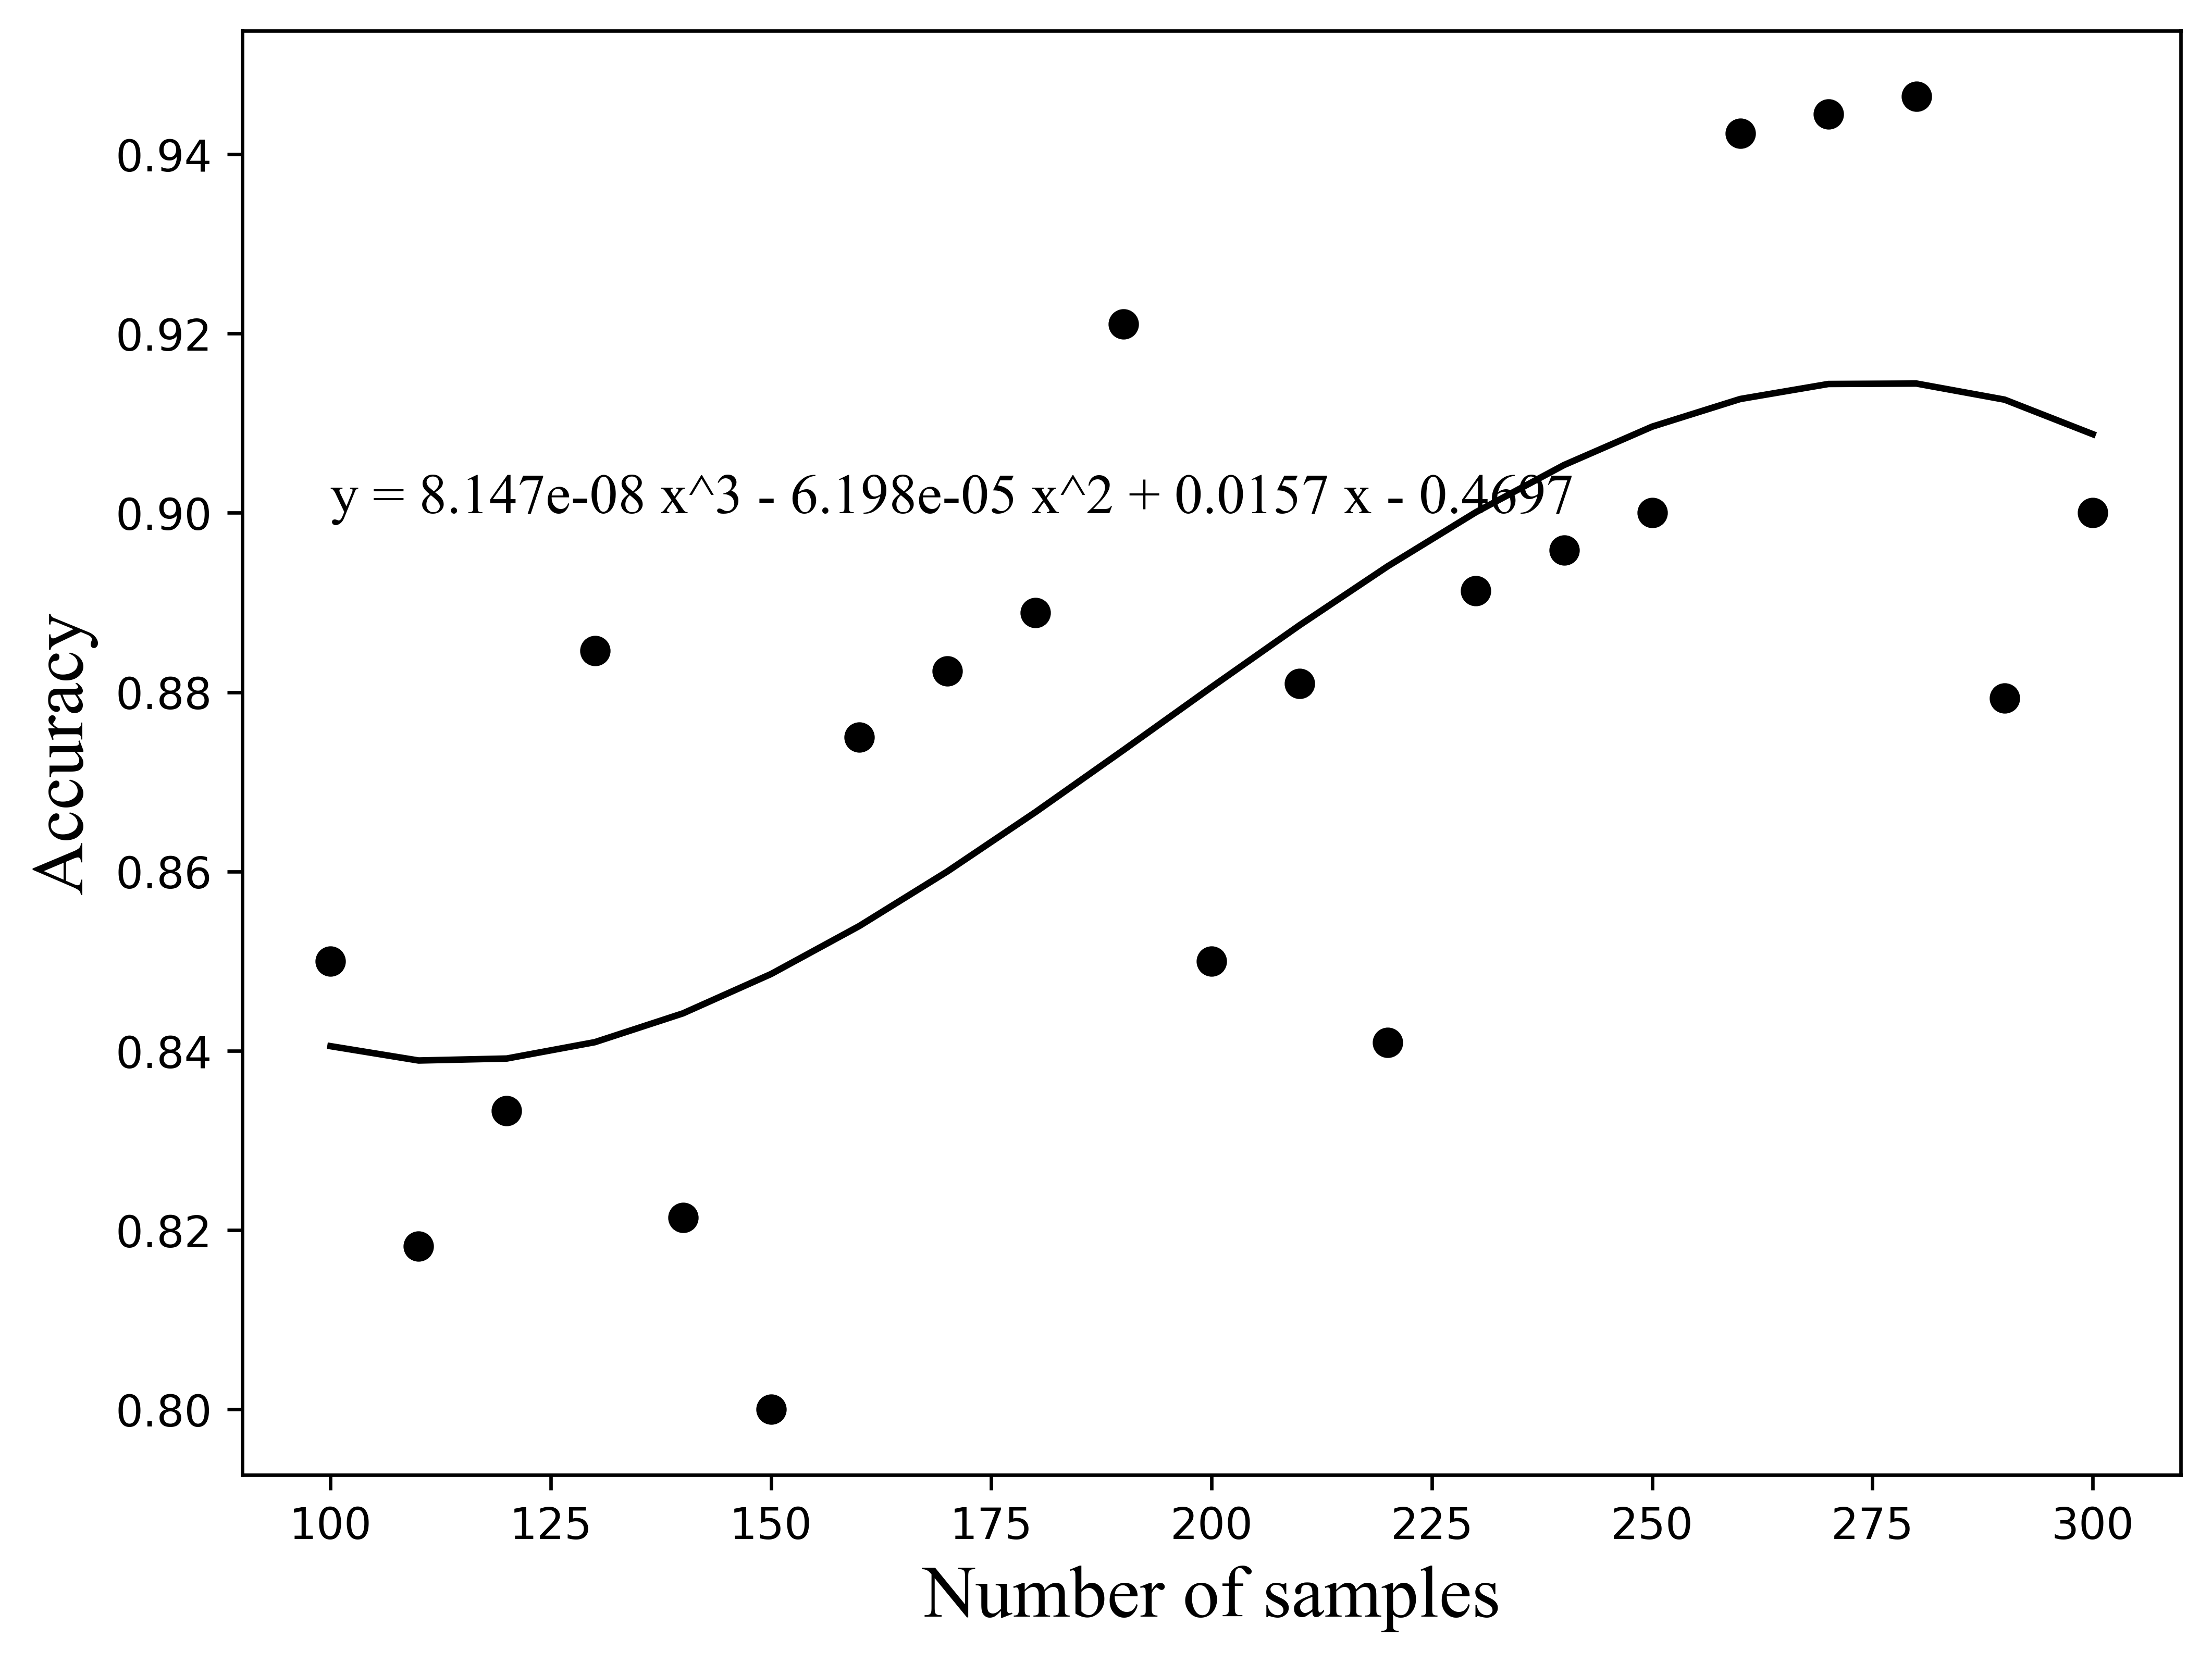

In [427]:
min_max_scaler = preprocessing.MinMaxScaler()
X2 = pd.DataFrame(min_max_scaler.fit_transform(X1),columns=None)

score_list=[]
leny=[]
lenx=[]
for i in range(21):
    #split data
    
    line=(i)*10+100
    
    X_train, X_test, y_train, y_test = train_test_split(
    X2.iloc[0:line,:], y[0:line], test_size=0.20, random_state=81)
    leny.append(len(y[0:line]))
    lenx.append(len(X2.iloc[0:line,:]))
    print
    #train
    param_grid = {'n_estimators':range(50,101,10),
                  'max_depth':range(5,8,1),
                  'max_features':range(5,8,1),
                  'min_samples_leaf':range(1,3,1),
                  'min_samples_split':range(2,3,1)}
    clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=3)
    clf = clf.fit(X_train, y_train)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)

    #predict
    y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred,zero_division=0))
    score = clf.score(X_test, y_test)
    score_list.append(score)
    
    #print ("score is: " + str(score))
#print('===================================================================')

#print("Average score is: " + str(sum_score/10))
#print()
#print (score_list)
#print(lenx)
#print(leny)
#print()
#print("max score is: "+ str(max(max_list)))

fig, axes = plt.subplots(figsize=(8,6),dpi=600)
axes.scatter(lenx,score_list,marker='o',color='black')
z1=np.polyfit(lenx,score_list,3)
p1 =np.poly1d(z1)
yvals=p1(lenx)
axes.plot(lenx,yvals,color = 'black')
axes.text(100, 0.9, ('y = 8.147e-08 x^3 - 6.198e-05 x^2 + 0.0157 x - 0.4697'),ha='left', va='baseline', fontsize=13,fontname='Times New Roman')
axes.set_xlabel(u'Number of samples',fontsize=17,fontproperties='Times New Roman')
axes.set_ylabel(u'Accuracy',fontsize=17,fontproperties='Times New Roman')
print(p1)

### Analysis
Similar to the relationship between the samples size and the model accuracy in support vector machine, the accuracy of the model in random forest has a positive correlation with the samples size, and the accuracy increases with the increase of the samples size and then slightly decrease.

### 3 A case study

### 3.1 A case study(Support vector machine )

In [416]:
min_max_scaler = preprocessing.MinMaxScaler()#Normalization of data
X2 = pd.DataFrame(min_max_scaler.fit_transform(X1),columns=None)
score_list=[]#Record accuracy

sum_score=0#Record total accuracy for average

#10 cycles, each time taking different 80% sample data to train the model
#for i in range(10):

    #The sample data is divided into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.20, random_state=81)

    #training model
param_grid = {'n_estimators':range(50,101,10),
                  'max_depth':range(5,8,1),
                  'max_features':range(5,8,1),
                  'min_samples_leaf':range(1,3,1),
                  'min_samples_split':range(2,3,1)}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=3)
clf = clf.fit(X_train, y_train)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)

    #Prediction are used to evaluate model accuracy
y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
score = clf.score(X_test, y_test)
score_list.append(score)
sum_score+=score
    
    #print ("score is: " + str(score))
    #print('===================================================================')

print("Average score is: " + str(sum_score/10))
print()
print (score_list)

print()
print("max score is: "+ str(max(score_list)))

#fig, axes = plt.subplots(figsize=(8,6))
#axes.plot(lenx,score_list,marker='o',markerfacecolor='blue')
#plt.show()

Average score is: 0.9349999999999999

[0.9333333333333333, 0.95, 0.95, 0.8666666666666667, 0.9833333333333333, 0.95, 0.9166666666666666, 0.9166666666666666, 0.9333333333333333, 0.95]

max score is: 0.9833333333333333


### 3.2 A case study(Random forest)

In [417]:
score_list=[]#Record accuracy

sum_score=0#Record total accuracy for average

##10 cycles, each time taking different 80% sample data to train the model
#for i in range(10):

    #The sample data is divided into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.20, random_state=81)

    #training model
param_grid = {'n_estimators':range(50,101,10),
                  'max_depth':range(5,8,1),
                  'max_features':range(5,8,1),
                  'min_samples_leaf':range(1,3,1),
                  'min_samples_split':range(2,3,1)}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=3)
clf = clf.fit(X_train, y_train)
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)

    #Prediction data are used to evaluate model accuracy
y_pred = clf.predict(X_test)
    #print(classification_report(y_test, y_pred))
score = clf.score(X_test, y_test)
score_list.append(score)
sum_score+=score
    
   # print ("score is: " + str(score))
    #print('===================================================================')

print("Average score is: " + str(sum_score/10))
print()
print (score_list)

print()
print("max score is: "+ str(max(score_list)))

#fig, axes = plt.subplots(figsize=(8,6))
#axes.plot(lenx,score_list,marker='o',markerfacecolor='blue')
#plt.show()

Average score is: 0.9433333333333331

[0.95, 0.9833333333333333, 0.95, 0.8666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9333333333333333, 0.9166666666666666, 0.95, 0.9166666666666666]

max score is: 0.9833333333333333


### Analysis
The average accurancy of random forest is slightly higher than the SVM.

### Results

For the sample data presented in this study, the performance of random forest is slightly better than that of support vector machine. This reflects the advantages of random forest processing in terms of missing data, as well as the advantages of ensemble learning , which means that multiple classifiers are ensembled together to make joint decisions, so that the errors are smaller. In addition, for the sample data in this study, as far as the algorithm implementation difficulty is concerned, the parameters of the random forest model are more complex, and the training of the model consumes more time.


I hope this was helpful,

*Qianjun Liu*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
